# COGS 108 - Final Project

# Overview

This project attempts to find a relationship between temporal trends and high priority crime to help the San Diego Parks and Recreation department adjust their security measures efficiently. Datasets from police calls made between 2015 and 2020 were used to analyze trends in crime calls by the hour, by months, by weekday, and by seasonality. A predictive model was also used to forecast predicted number of crime calls for the next 10 years. From the analysis, crime calls had a strong trend in when they occurred by hour during the day, and also had a trend in what season they occured the most. No significant relationship was found between crime calls and the weekday they occured on.

# Name & GitHub

* Name: Christian Jo
* GitHub Username: Cjohh

# Research Question

What are the temporal patterns in high priority crime in San Diego and how should Parks and Recreation adjust their security measures to these patterns?

## Background and Prior Work

Research done by Craig A. Anderson and some of his colleagues revealed that higher temperatures increases the likelihood of physical aggresion and violence. Throughout various studies, participants were measured on perceived hostility, anger, and behavioral aggression in rooms of various temperatures. Some participants were placed in a room with a very comfortable temperature of around 75 degrees Farenheit while others were placed in rooms that were either very cold (57F) or very hot (97F). Participants in the more extreme temperature rooms scored higher on a state hostility scale and perceived various filmed interactions as being more hostile and aggressive compared to those in the comfortable room. [1]

Another study done by researchers Aldert Vrij, Jaap van der Steen, and Leendert Koppelaar had 38 police officers go through a firearms training simulation in  either a comfortable-temperature room (70 F) or a hotter-temperature room (81 F). The simulation had the officers responding to a bulgary alarm and having a suspect appear with a crowbar. The results of the study showed that the 85% of the officers in the warmer room were more likely to draw their gun compared to 59% of the officers in the more comfortable room, illustrating that hotter temperatures affect people's perception of danger threat levels and hostility. [1]

Research done on factors influencing temporal patterns in crime by Sherry Towers, Siqiao Chen, Abish Malik, and David Ebert display how things like weather, holidays, school vacations, day-of-week, and paydays affect crime rates in Chicago. The results showed that there was significant depenence of crime on the time of year, holidays, and weekdays. They also found that the dependence of crime on temperature depended on the hour of the day. [2]

References (including links):
1. https://www.psychologicalscience.org/observer/global-warming-and-violent-behavior
2. https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0205151#pone.0205151.ref008

# Hypothesis

I believe that the number of calls to report crime will be higher during the later hours of the night and especially during the weekends. This is because the night has better conditions for committing crimes due to lower visibility and probability of witnesses. I also hypothesize that the highest number of calls will be during the summer due to the heat.  

# Dataset(s)

For this analysis, I used six datasets that had data on calls dispatched by the San Diego Police Department's communications dispatch center over the past six years starting from 2015. Each dataset is structured the same way with information on the incident number, date and time of the call, day of the week, address, type of call, disposition or classification of the crime, beat, and priority of the call. The only information I needed from each dataset was the date and time of the call, and the priority of the call. In order to filter out the low priority calls, only the rows with a priority of 0, 1, or 2 were used. After filtering out the low priority calls, 2015 had 496633 rows, 2016 had 455549 rows, 2017 had 453764 rows, 2018 had 364321 rows, 2019 had 408081 rows, and 2020 had 360767 rows.

# Setup

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
sns.set(rc={'figure.figsize':(11,4)})

import patsy
import statsmodels.api as sm

import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.dates as mdates

%config InlineBackend.figure_format = 'retina'


In [2]:
#Reading in Police calls in 2020 data
df_2020 = pd.read_csv('https://raw.githubusercontent.com/COGS108/individual_fa20/master/data/pd_calls_for_service_2020_datasd.csv')
df_2020_copy = pd.read_csv('https://raw.githubusercontent.com/COGS108/individual_fa20/master/data/pd_calls_for_service_2020_datasd.csv')

#Reading in Police calls in 2019 data
df_2019 = pd.read_csv('pd_calls_for_service_2019_datasd.csv')
df_2019_copy = pd.read_csv('pd_calls_for_service_2019_datasd.csv')

#Reading in Police calls in 2018 data
df_2018 = pd.read_csv('pd_calls_for_service_2018_datasd.csv')
df_2018_copy = pd.read_csv('pd_calls_for_service_2018_datasd.csv')

#Reading in Police calls in 2017 data
df_2017 = pd.read_csv('pd_calls_for_service_2017_datasd_v1.csv')
df_2017_copy = pd.read_csv('pd_calls_for_service_2017_datasd_v1.csv')

#Reading in Police calls in 2016 data
df_2016 = pd.read_csv('pd_calls_for_service_2016_datasd_v1.csv')
df_2016_copy = pd.read_csv('pd_calls_for_service_2016_datasd_v1.csv')

#Reading in Police calls in 2015 data
df_2015 = pd.read_csv('pd_calls_for_service_2015_datasd_v1.csv')
df_2015_copy = pd.read_csv('pd_calls_for_service_2015_datasd_v1.csv')

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (7,9,12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Data Cleaning

In [3]:
#Changing the priority column values to numeric type 
df_2017['priority'] = df_2017['priority'].str.extract('(\d+)', expand=False)
df_2017['priority'] = pd.to_numeric(df_2017['priority'])

df_2016['priority'] = df_2016['priority'].str.extract('(\d+)', expand=False)
df_2016['priority'] = pd.to_numeric(df_2016['priority'])

In [4]:
#Dropping unneeded columns and low priority calls in 2020 dataframe
df_2020 = df_2020.drop(['incident_num', 'address_number_primary', 'address_dir_primary', 'address_road_primary', 'address_sfx_primary', 'address_dir_intersecting', 'address_road_intersecting', 'address_sfx_intersecting', 'call_type', 'disposition', 'beat'], axis = 1)
df_2020.drop(df_2020[df_2020['priority'] > 2].index, inplace = True)
df_2020 = df_2020.drop(['priority'], axis=1)

#Dropping unneeded columns and low priority calls in 2019 dataframe
df_2019 = df_2019.drop(['incident_num', 'address_number_primary', 'address_dir_primary', 'address_road_primary', 'address_sfx_primary', 'address_dir_intersecting', 'address_road_intersecting', 'address_sfx_intersecting', 'call_type', 'disposition', 'beat'], axis = 1)
df_2019.drop(df_2019[df_2019['priority'] > 2].index, inplace = True)
df_2019 = df_2019.drop(['priority'], axis=1)

#Dropping unneeded columns and low priority calls in 2018 dataframe
df_2018 = df_2018.drop(['incident_num', 'address_number_primary', 'address_dir_primary', 'address_road_primary', 'address_sfx_primary', 'address_dir_intersecting', 'address_road_intersecting', 'address_sfx_intersecting', 'call_type', 'disposition', 'beat'], axis = 1)
df_2018.drop(df_2018[df_2018['priority'] > 2].index, inplace = True)
df_2018 = df_2018.drop(['priority'], axis=1)

#Dropping unneeded columns and low priority calls in 2017 dataframe
df_2017 = df_2017.drop(['incident_num', 'address_number_primary', 'address_dir_primary', 'address_road_primary', 'address_sfx_primary', 'address_dir_intersecting', 'address_road_intersecting', 'address_sfx_intersecting', 'call_type', 'disposition', 'beat'], axis = 1)
df_2017.drop(df_2017[df_2017['priority'] > 2].index, inplace = True)
df_2017 = df_2017.drop(['priority'], axis=1)

#Dropping unneeded columns and low priority calls in 2016 dataframe
df_2016 = df_2016.drop(['incident_num', 'address_number_primary', 'address_dir_primary', 'address_road_primary', 'address_sfx_primary', 'address_dir_intersecting', 'address_road_intersecting', 'address_sfx_intersecting', 'call_type', 'disposition', 'beat'], axis = 1)
df_2016.drop(df_2016[df_2016['priority'] > 2].index, inplace = True)
df_2016 = df_2016.drop(['priority'], axis=1)

#Dropping unneeded columns and low priority calls in 2015 dataframe
df_2015 = df_2015.drop(['incident_num', 'address_number_primary', 'address_dir_primary', 'address_road_primary', 'address_sfx_primary', 'address_dir_intersecting', 'address_road_intersecting', 'address_sfx_intersecting', 'call_type', 'disposition', 'beat'], axis = 1)
df_2015.drop(df_2015[df_2015['priority'] > 2.0].index, inplace = True)
df_2015 = df_2015.drop(['priority'], axis=1)

In [5]:
#Checking for any null values in dataframes
df_2020.isnull().values.any()
df_2019.isnull().values.any()
df_2018.isnull().values.any()
df_2017.isnull().values.any()
df_2016.isnull().values.any()
df_2015.isnull().values.any()

False

In [6]:
#Extracting the hour from the date_time column

df_2020_copy['date_time'] = df_2020_copy['date_time'].str[11:13]

df_2019_copy['date_time'] = df_2019_copy['date_time'].str[11:13]

df_2018_copy['date_time'] = df_2018_copy['date_time'].str[11:13]

df_2017_copy['date_time'] = df_2017_copy['date_time'].str[11:13]

df_2016_copy['date_time'] = df_2016_copy['date_time'].str[11:13]

df_2015_copy['date_time'] = df_2015_copy['date_time'].str[11:13]

In [7]:
#Getting the number of calls per hour
df_2020_time = pd.DataFrame(df_2020_copy['date_time'].value_counts())
df_2019_time = pd.DataFrame(df_2019_copy['date_time'].value_counts())
df_2018_time = pd.DataFrame(df_2018_copy['date_time'].value_counts())
df_2017_time = pd.DataFrame(df_2017_copy['date_time'].value_counts())
df_2016_time = pd.DataFrame(df_2016_copy['date_time'].value_counts())
df_2015_time = pd.DataFrame(df_2015_copy['date_time'].value_counts())

#Renaming 'date_time' columns into 'count' by year
df_2020_time = df_2020_time.rename(columns={'date_time': 'count_2020'})
df_2019_time = df_2019_time.rename(columns={'date_time': 'count_2019'})
df_2018_time = df_2018_time.rename(columns={'date_time': 'count_2018'})
df_2017_time = df_2017_time.rename(columns={'date_time': 'count_2017'})
df_2016_time = df_2016_time.rename(columns={'date_time': 'count_2016'})
df_2015_time = df_2015_time.rename(columns={'date_time': 'count_2015'})


In [8]:
#Merging all the time dataframes into df_all_time and ordering by hour
df_all_time = pd.merge(df_2015_time, df_2016_time, left_index=True, right_index=True)
df_all_time = pd.merge(df_all_time, df_2017_time, left_index=True, right_index=True)
df_all_time = pd.merge(df_all_time, df_2018_time, left_index=True, right_index=True)
df_all_time = pd.merge(df_all_time, df_2019_time, left_index=True, right_index=True)
df_all_time = pd.merge(df_all_time, df_2020_time, left_index=True, right_index=True)
df_all_time = df_all_time.sort_index()

In [9]:
#Making the hours into its own column 
df_all_time.reset_index(inplace=True)
df_all_time = df_all_time.rename(columns={'index':'hour'})
df_all_time

,hour,count_2015,count_2016,count_2017,count_2018,count_2019,count_2020
0,00,23764,22804,22550,20856,20930,18735
1,01,19772,19054,18419,17139,16440,13786
2,02,16692,16038,15757,14227,14121,11099
3,03,11950,12039,11368,10683,10704,8763
4,04,9895,9688,8978,8597,8969,7785
5,05,9835,9787,9904,10101,10880,10432
6,06,14582,15088,14595,16106,17737,17255
7,07,24960,24689,23743,24749,27357,23725
8,08,30317,28862,27982,29138,32447,27182
9,09,30959,29214,28553,30243,33500,28145


In [10]:
#Extracting the month from the date_time column

df_2020['date_time'] = df_2020['date_time'].str[:10]

df_2019['date_time'] = df_2019['date_time'].str[:10]

df_2018['date_time'] = df_2018['date_time'].str[:10]

df_2017['date_time'] = df_2017['date_time'].str[:10]

df_2016['date_time'] = df_2016['date_time'].str[:10]

df_2015['date_time'] = df_2015['date_time'].str[:10]

In [11]:
df_2020_month = pd.DataFrame(df_2020['date_time'].str[5:7])

df_2019_month = pd.DataFrame(df_2019['date_time'].str[5:7])

df_2018_month = pd.DataFrame(df_2018['date_time'].str[5:7])

df_2017_month = pd.DataFrame(df_2017['date_time'].str[5:7])

df_2016_month = pd.DataFrame(df_2016['date_time'].str[5:7])

df_2015_month = pd.DataFrame(df_2015['date_time'].str[5:7])

In [12]:
#Getting the number of calls per month
df_2020_month = pd.DataFrame(df_2020_month['date_time'].value_counts())
df_2019_month = pd.DataFrame(df_2019_month['date_time'].value_counts())
df_2018_month = pd.DataFrame(df_2018_month['date_time'].value_counts())
df_2017_month = pd.DataFrame(df_2017_month['date_time'].value_counts())
df_2016_month = pd.DataFrame(df_2016_month['date_time'].value_counts())
df_2015_month = pd.DataFrame(df_2015_month['date_time'].value_counts())

#Renaming 'date_time' columns into 'count' by year
df_2020_month = df_2020_month.rename(columns={'date_time': 'count_2020'})
df_2019_month = df_2019_month.rename(columns={'date_time': 'count_2019'})
df_2018_month = df_2018_month.rename(columns={'date_time': 'count_2018'})
df_2017_month = df_2017_month.rename(columns={'date_time': 'count_2017'})
df_2016_month = df_2016_month.rename(columns={'date_time': 'count_2016'})
df_2015_month = df_2015_month.rename(columns={'date_time': 'count_2015'})

In [13]:
#Merging all the time dataframes into df_all and ordering by month
df_all = pd.merge(df_2015_month, df_2016_month, left_index=True, right_index=True)
df_all = pd.merge(df_all, df_2017_month, left_index=True, right_index=True)
df_all = pd.merge(df_all, df_2018_month, left_index=True, right_index=True)
df_all = pd.merge(df_all, df_2019_month, left_index=True, right_index=True)
df_all = pd.merge(df_all, df_2020_month, left_index=True, right_index=True)
df_all = df_all.sort_index()

In [14]:
#Making the months into its own column
df_all.reset_index(inplace=True)
df_all = df_all.rename(columns={'index':'month'})
df_all

,month,count_2015,count_2016,count_2017,count_2018,count_2019,count_2020
0,01,42989,37924,38155,26231,31787,34814
1,02,39908,36990,36091,24409,28916,33228
2,03,44406,38154,41065,27756,33977,32987
3,04,42922,38106,36819,26509,32735,32278
4,05,45051,38886,38696,30333,34950,34061
5,06,29397,38283,38895,32411,34933,27268
6,07,43955,39782,39876,34172,38238,34268
7,08,43991,38858,37628,33688,36949,33226
8,09,43390,38189,38032,32329,35088,32690
9,10,43119,37870,32475,33862,35051,34303


In [15]:
#Changing the date_time column into a time series
df_2020['date_time'] = pd.to_datetime(df_2020['date_time'])
df_2019['date_time'] = pd.to_datetime(df_2019['date_time'])
df_2018['date_time'] = pd.to_datetime(df_2018['date_time'])
df_2017['date_time'] = pd.to_datetime(df_2017['date_time'])
df_2016['date_time'] = pd.to_datetime(df_2016['date_time'])
df_2015['date_time'] = pd.to_datetime(df_2015['date_time'])

In [16]:
#Making a dataframe for each year on the number of calls per month
df_2020_counts = pd.DataFrame(df_2020['date_time'].value_counts())
df_2020_counts = df_2020_counts.sort_index()
df_2020_counts.columns = ['count']

df_2019_counts = pd.DataFrame(df_2019['date_time'].value_counts())
df_2019_counts = df_2019_counts.sort_index()
df_2019_counts.columns = ['count']

df_2018_counts = pd.DataFrame(df_2018['date_time'].value_counts())
df_2018_counts = df_2018_counts.sort_index()
df_2018_counts.columns = ['count']

df_2017_counts = pd.DataFrame(df_2017['date_time'].value_counts())
df_2017_counts = df_2017_counts.sort_index()
df_2017_counts.columns = ['count']

df_2016_counts = pd.DataFrame(df_2016['date_time'].value_counts())
df_2016_counts = df_2016_counts.sort_index()
df_2016_counts.columns = ['count']

df_2015_counts = pd.DataFrame(df_2015['date_time'].value_counts())
df_2015_counts = df_2015_counts.sort_index()
df_2015_counts.columns = ['count']

In [17]:
#Adding the year, month, and weekday to each dataframe
df_2020_counts['Year'] = df_2020_counts.index.year
df_2020_counts['Month'] = df_2020_counts.index.month
df_2020_counts['Weekday'] = df_2020_counts.index.weekday_name

df_2019_counts['Year'] = df_2019_counts.index.year
df_2019_counts['Month'] = df_2019_counts.index.month
df_2019_counts['Weekday'] = df_2019_counts.index.weekday_name

df_2018_counts['Year'] = df_2018_counts.index.year
df_2018_counts['Month'] = df_2018_counts.index.month
df_2018_counts['Weekday'] = df_2018_counts.index.weekday_name

df_2017_counts['Year'] = df_2017_counts.index.year
df_2017_counts['Month'] = df_2017_counts.index.month
df_2017_counts['Weekday'] = df_2017_counts.index.weekday_name

df_2016_counts['Year'] = df_2016_counts.index.year
df_2016_counts['Month'] = df_2016_counts.index.month
df_2016_counts['Weekday'] = df_2016_counts.index.weekday_name

df_2015_counts['Year'] = df_2015_counts.index.year
df_2015_counts['Month'] = df_2015_counts.index.month
df_2015_counts['Weekday'] = df_2015_counts.index.weekday_name

df_2020_counts

,count,Year,Month,Weekday
2020-01-01,1084,2020,1,Wednesday
2020-01-02,1055,2020,1,Thursday
2020-01-03,1196,2020,1,Friday
2020-01-04,1114,2020,1,Saturday
2020-01-05,1035,2020,1,Sunday
...,...,...,...,...
2020-11-27,961,2020,11,Friday
2020-11-28,956,2020,11,Saturday
2020-11-29,893,2020,11,Sunday
2020-11-30,999,2020,11,Monday


In [18]:
#Average number of calls in June 2015
juneAvg = 1400

#Adding missing data
df_2015_counts.loc[pd.to_datetime('2015-06-22 00:00:00')] = [juneAvg, 2015, 6, 'Monday']
df_2015_counts.loc[pd.to_datetime('2015-06-23 00:00:00')] = [juneAvg, 2015, 6, 'Tuesday']
df_2015_counts.loc[pd.to_datetime('2015-06-24 00:00:00')] = [juneAvg, 2015, 6, 'Wednesday']
df_2015_counts.loc[pd.to_datetime('2015-06-25 00:00:00')] = [juneAvg, 2015, 6, 'Thursday']
df_2015_counts.loc[pd.to_datetime('2015-06-26 00:00:00')] = [juneAvg, 2015, 6, 'Friday']
df_2015_counts.loc[pd.to_datetime('2015-06-27 00:00:00')] = [juneAvg, 2015, 6, 'Saturday']
df_2015_counts.loc[pd.to_datetime('2015-06-28 00:00:00')] = [juneAvg, 2015, 6, 'Sunday']
df_2015_counts.loc[pd.to_datetime('2015-06-29 00:00:00')] = [juneAvg, 2015, 6, 'Monday']
df_2015_counts.loc[pd.to_datetime('2015-06-30 00:00:00')] = [juneAvg, 2015, 6, 'Tuesday']
df_2015_counts = df_2015_counts.sort_index()

In [19]:
#Making one dataframe for all the years
df_together = pd.concat([df_2015_counts, df_2016_counts, df_2017_counts, df_2018_counts, df_2019_counts, df_2020_counts])
df_together = df_together.rename(columns = {'date_time': 'number_of_calls'})

df_together['Year'] = df_together.index.year
df_together['Month'] = df_together.index.month
df_together['Weekday'] = df_together.index.weekday_name
df_together

,count,Year,Month,Weekday
2015-01-01,1508,2015,1,Thursday
2015-01-02,1330,2015,1,Friday
2015-01-03,1324,2015,1,Saturday
2015-01-04,1192,2015,1,Sunday
2015-01-05,1357,2015,1,Monday
...,...,...,...,...
2020-11-27,961,2020,11,Friday
2020-11-28,956,2020,11,Saturday
2020-11-29,893,2020,11,Sunday
2020-11-30,999,2020,11,Monday


# Data Analysis & Results

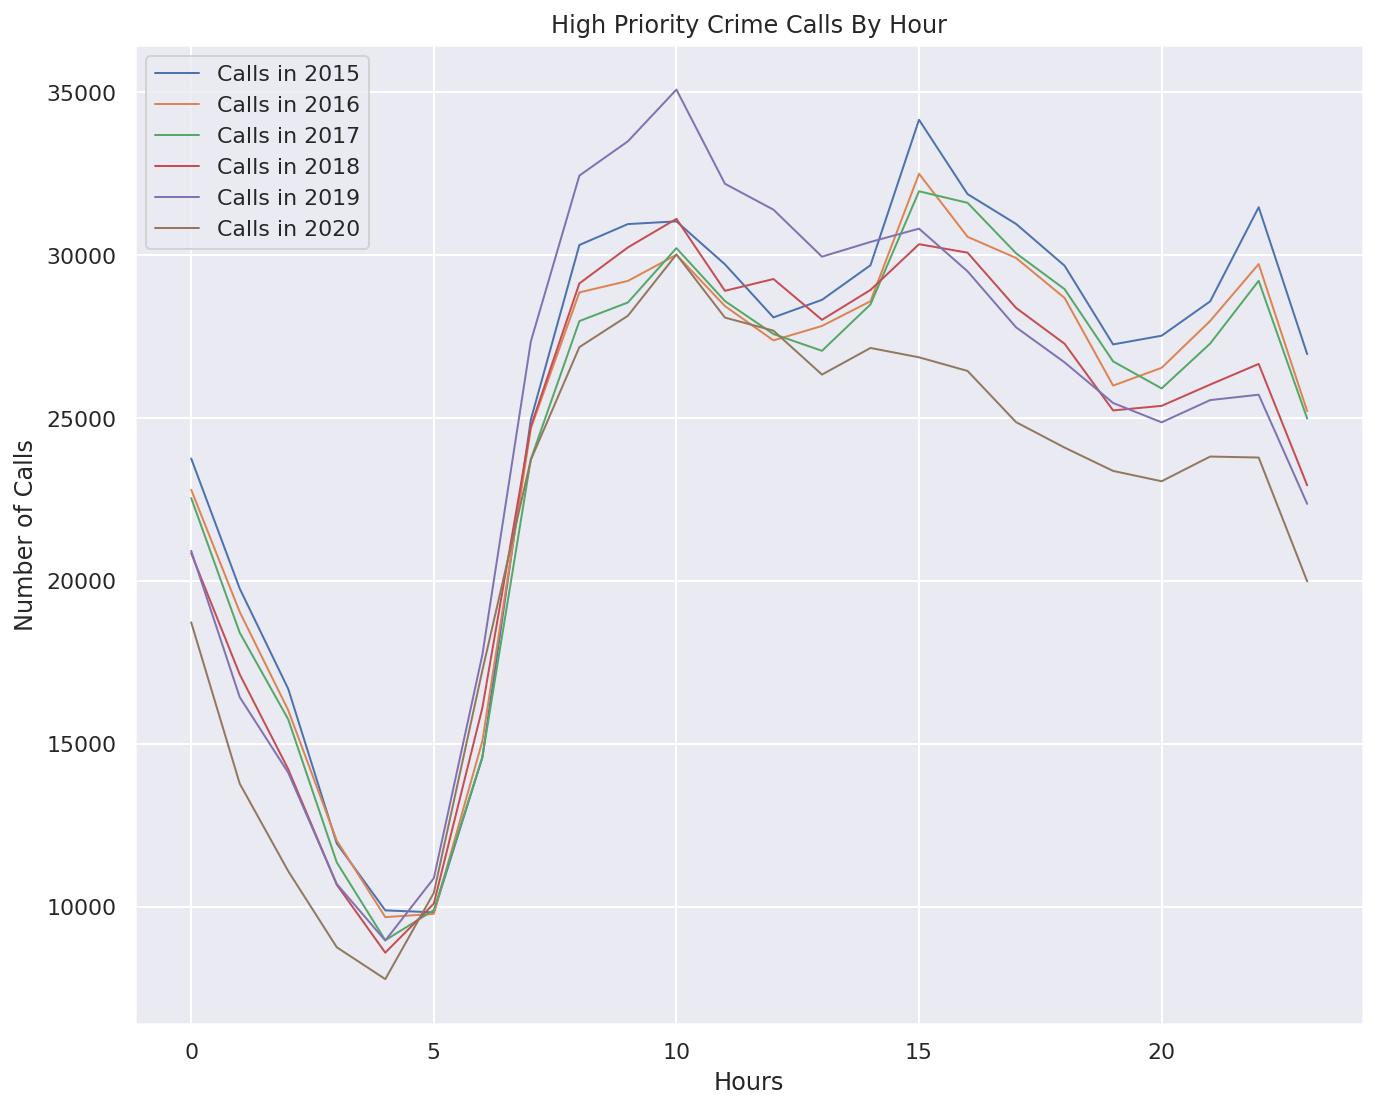

In [20]:
#Plotting number of calls by hour of the day for each year
fig, ax = plt.subplots(figsize=(11,9))
ax.plot(df_all_time['count_2015'], linewidth=1.0, label='Calls in 2015')
ax.plot(df_all_time['count_2016'], linewidth=1.0, label='Calls in 2016')
ax.plot(df_all_time['count_2017'], linewidth=1.0, label='Calls in 2017')
ax.plot(df_all_time['count_2018'], linewidth=1.0, label='Calls in 2018')
ax.plot(df_all_time['count_2019'], linewidth=1.0, label='Calls in 2019')
ax.plot(df_all_time['count_2020'], linewidth=1.0, label='Calls in 2020')
ax.set_xlabel('Hours')
ax.set_ylabel('Number of Calls')
ax.set_title('High Priority Crime Calls By Hour')
ax.legend()


Figure 1: The plot of all the crime calls received by the hour shows a very similar trend every year. This suggests a strong trend that high priority crime calls spike around 10am, again at 3pm, and finally at 10pm once more. 

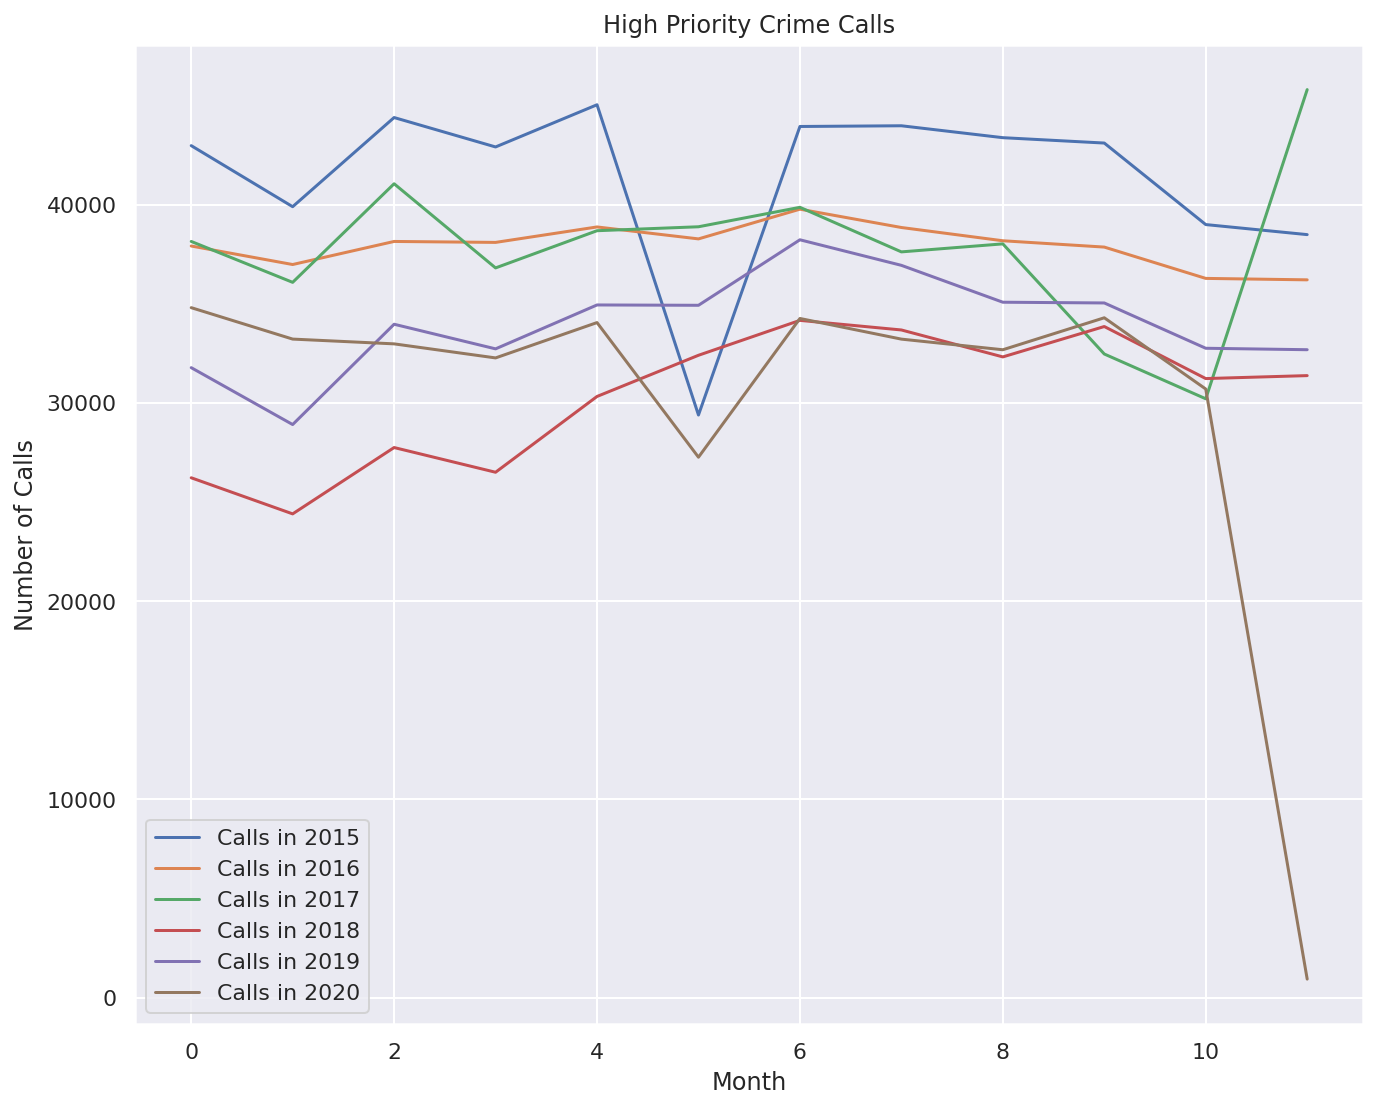

In [21]:
#Plotting number of calls per month for each year
fig, ax = plt.subplots(figsize=(11,9))
ax.plot(df_all['count_2015'], linewidth=1.5, label='Calls in 2015')
ax.plot(df_all['count_2016'], linewidth=1.5, label='Calls in 2016')
ax.plot(df_all['count_2017'], linewidth=1.5, label='Calls in 2017')
ax.plot(df_all['count_2018'], linewidth=1.5, label='Calls in 2018')
ax.plot(df_all['count_2019'], linewidth=1.5, label='Calls in 2019')
ax.plot(df_all['count_2020'], linewidth=1.5, label='Calls in 2020')
ax.set_xlabel('Month')
ax.set_ylabel('Number of Calls')
ax.set_title('High Priority Crime Calls')
ax.legend()


Figure 2: This plot of high priority crime calls by month show that the trend of calls was fairly similar in all 5 years except for 2015 and 2020 where they both had a sharp dip in May. 

Text(0.5, 1.0, 'High Priority Crime Calls By Weekday in 2020')

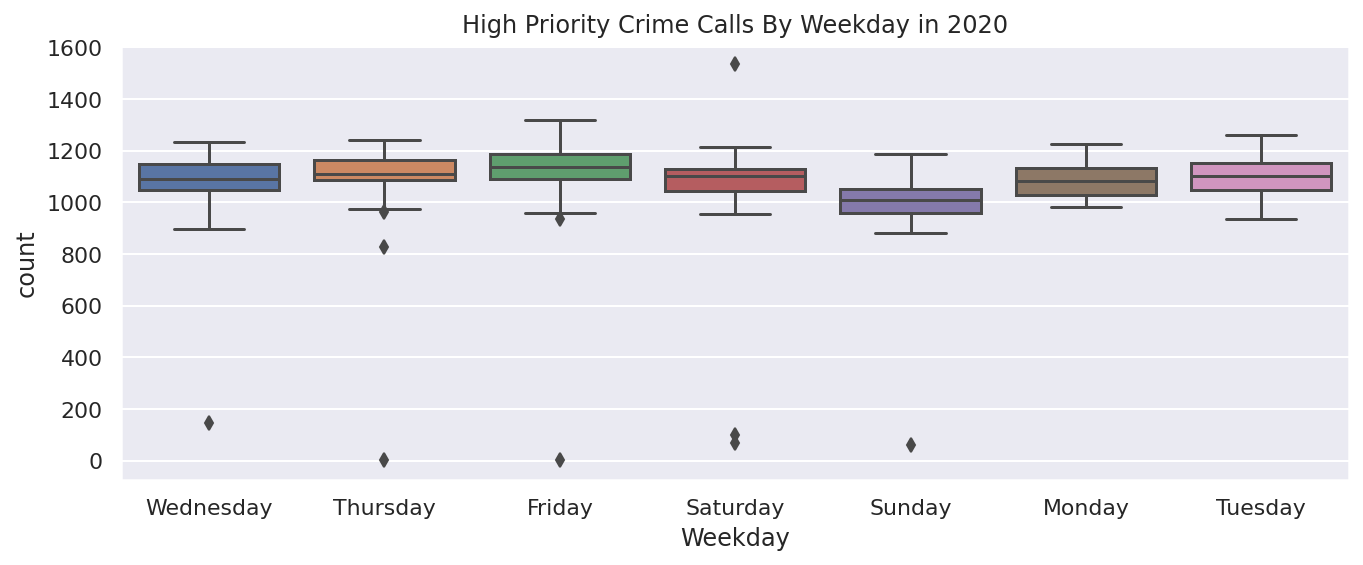

In [22]:
#Boxplot of high priority crime calls by weekday in 2020
sns.boxplot(data=df_2020_counts, x='Weekday', y='count').set_title('High Priority Crime Calls By Weekday in 2020')

Text(0.5, 1.0, 'High Priority Crime Calls By Weekday in 2019')

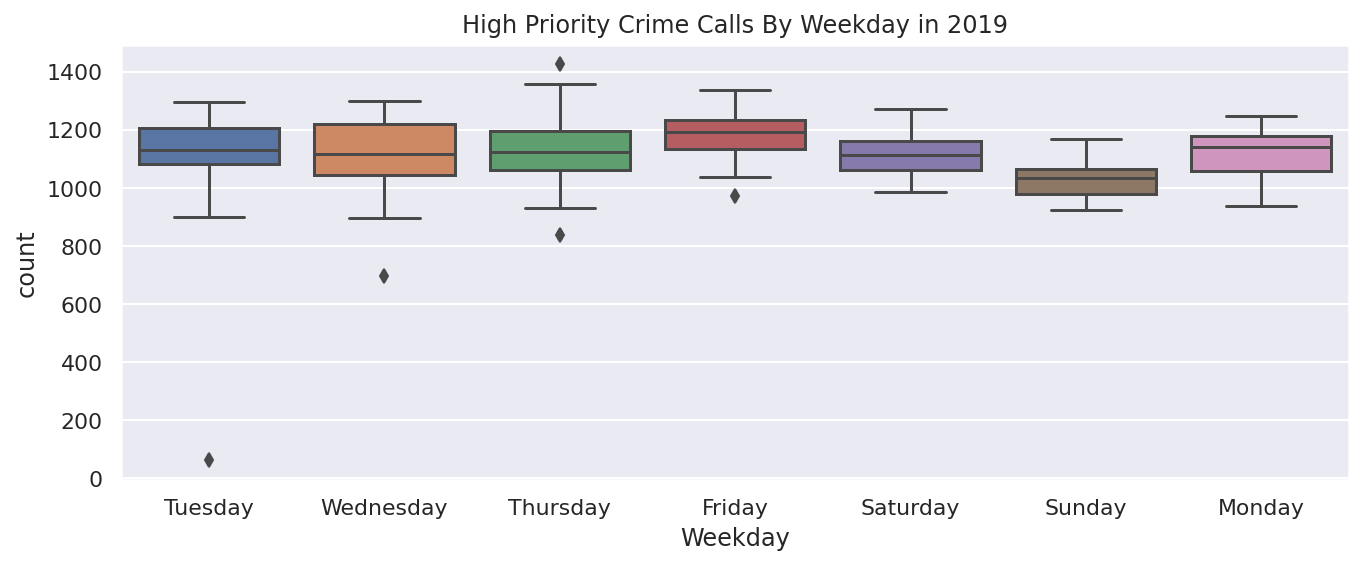

In [23]:
#Boxplot of high priority crime calls by weekday in 2019
sns.boxplot(data=df_2019_counts, x='Weekday', y='count').set_title('High Priority Crime Calls By Weekday in 2019')

Text(0.5, 1.0, 'High Priority Crime Calls By Weekday in 2018')

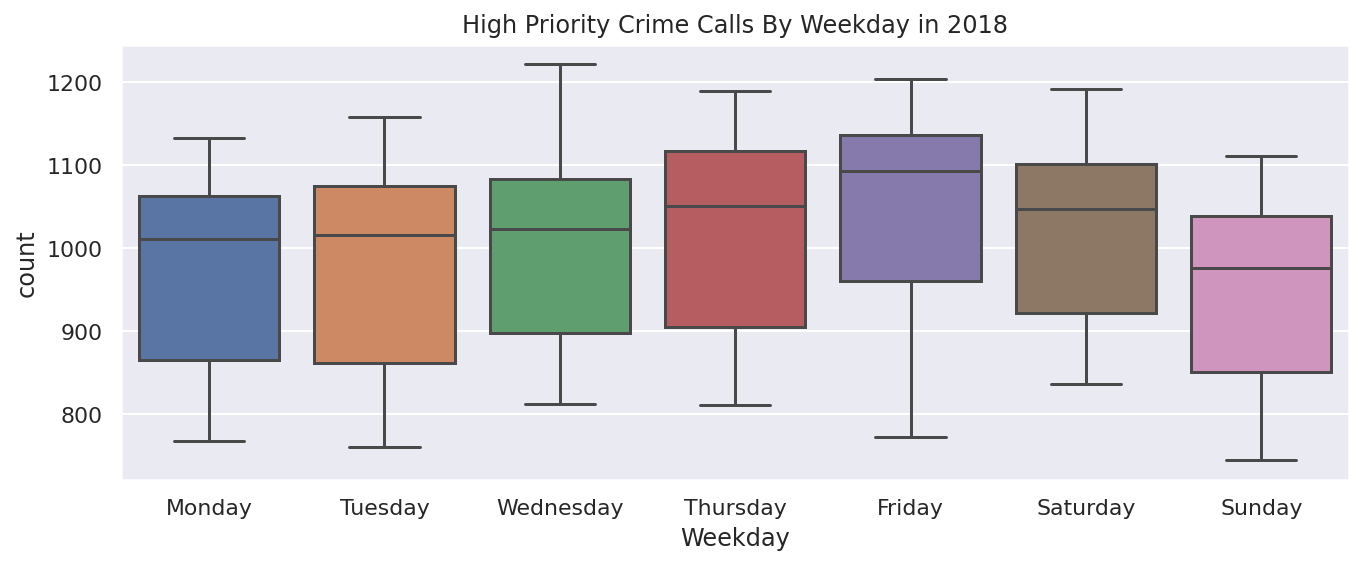

In [24]:
#Boxplot of high priority crime calls by weekday in 2018
sns.boxplot(data=df_2018_counts, x='Weekday', y='count').set_title('High Priority Crime Calls By Weekday in 2018')

Text(0.5, 1.0, 'High Priority Crime Calls By Weekday in 2017')

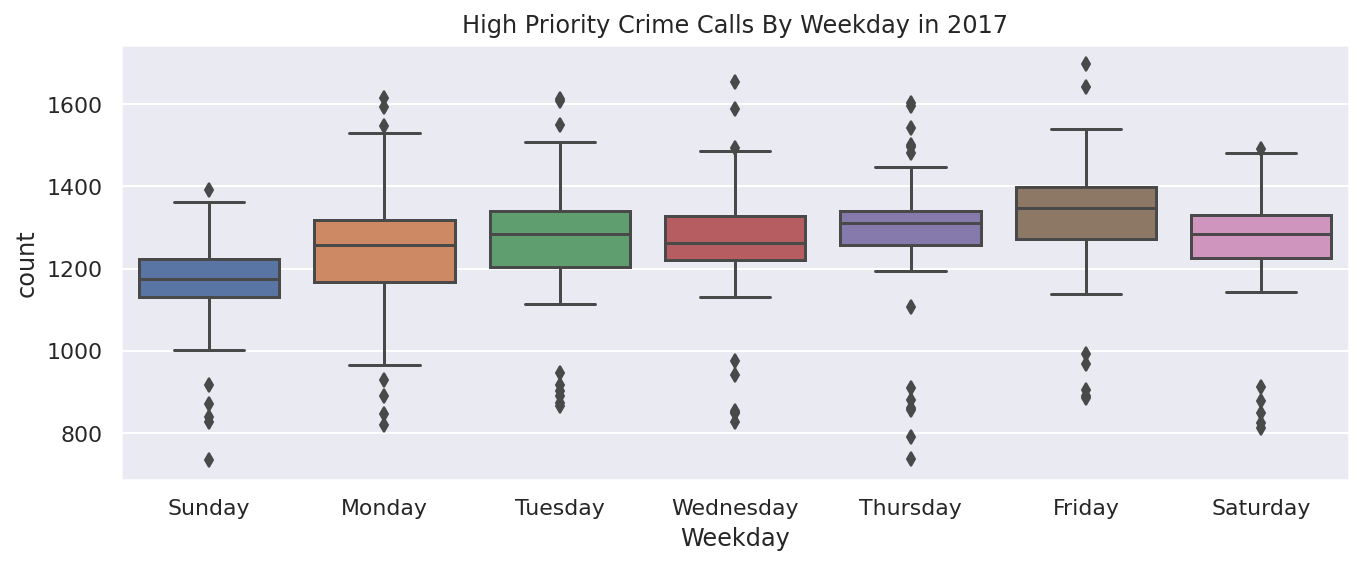

In [25]:
#Boxplot of high priority crime calls by weekday in 2017
sns.boxplot(data=df_2017_counts, x='Weekday', y='count').set_title('High Priority Crime Calls By Weekday in 2017')

Text(0.5, 1.0, 'High Priority Crime Calls By Weekday in 2016')

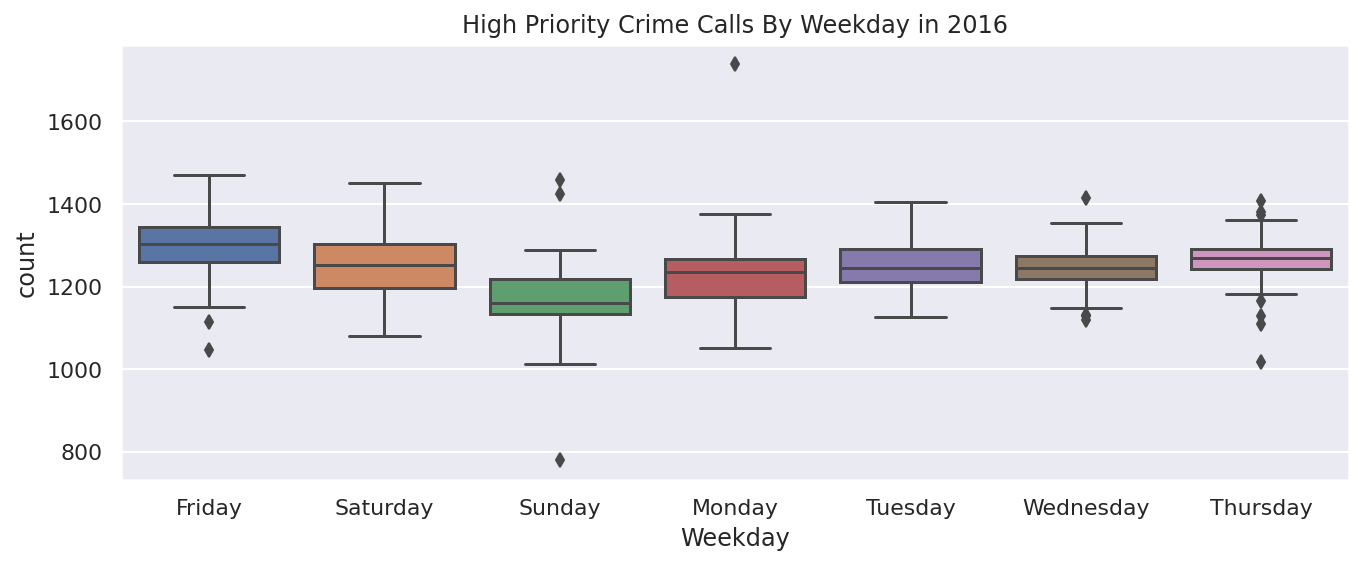

In [26]:
#Boxplot of high priority crime calls by weekday in 2016
sns.boxplot(data=df_2016_counts, x='Weekday', y='count').set_title('High Priority Crime Calls By Weekday in 2016')

Text(0.5, 1.0, 'High Priority Crime Calls By Weekday in 2015')

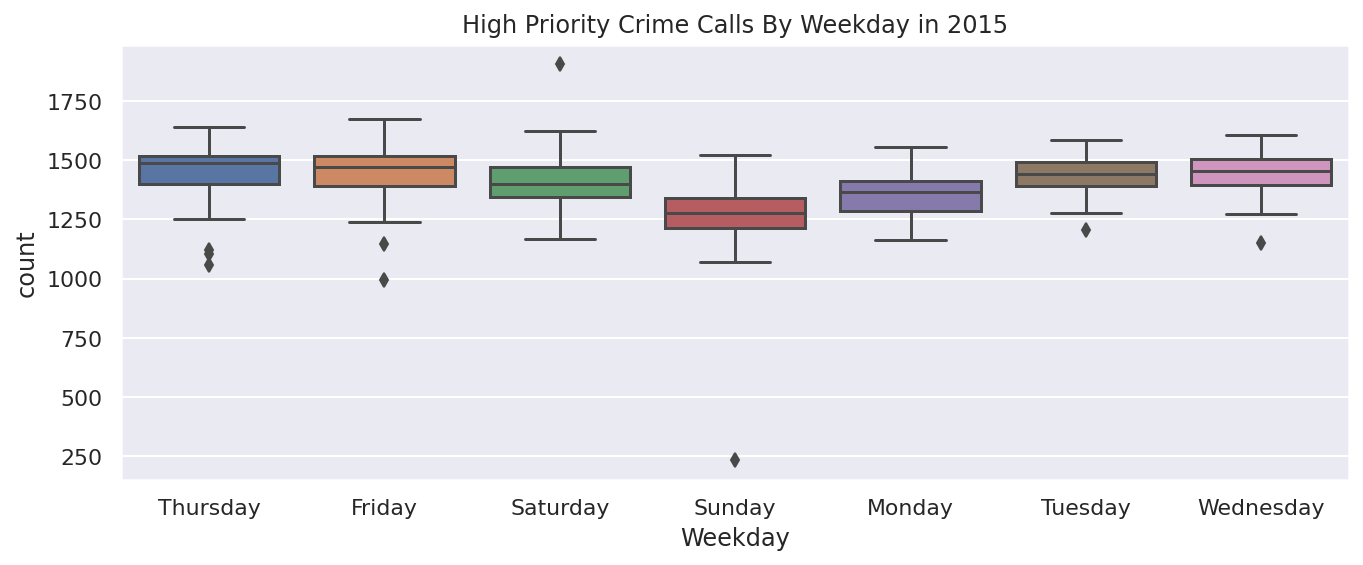

In [27]:
#Boxplot of high priority crime calls by weekday in 2015
sns.boxplot(data=df_2015_counts, x='Weekday', y='count').set_title('High Priority Crime Calls By Weekday in 2015')

Figure 3: The group of boxplots that show the calls by weekday don't show any significant patterns throughout the years

In [28]:
#Resample by mean each week 
df_2020_mean = pd.DataFrame(df_2020_counts['count'].resample('W').mean())
df_2019_mean = pd.DataFrame(df_2019_counts['count'].resample('W').mean())
df_2018_mean = pd.DataFrame(df_2018_counts['count'].resample('W').mean())
df_2017_mean = pd.DataFrame(df_2017_counts['count'].resample('W').mean())
df_2016_mean = pd.DataFrame(df_2016_counts['count'].resample('W').mean())
df_2015_mean = pd.DataFrame(df_2015_counts['count'].resample('W').mean())

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Daily and Weekly Resampled Crime Calls in 2015')

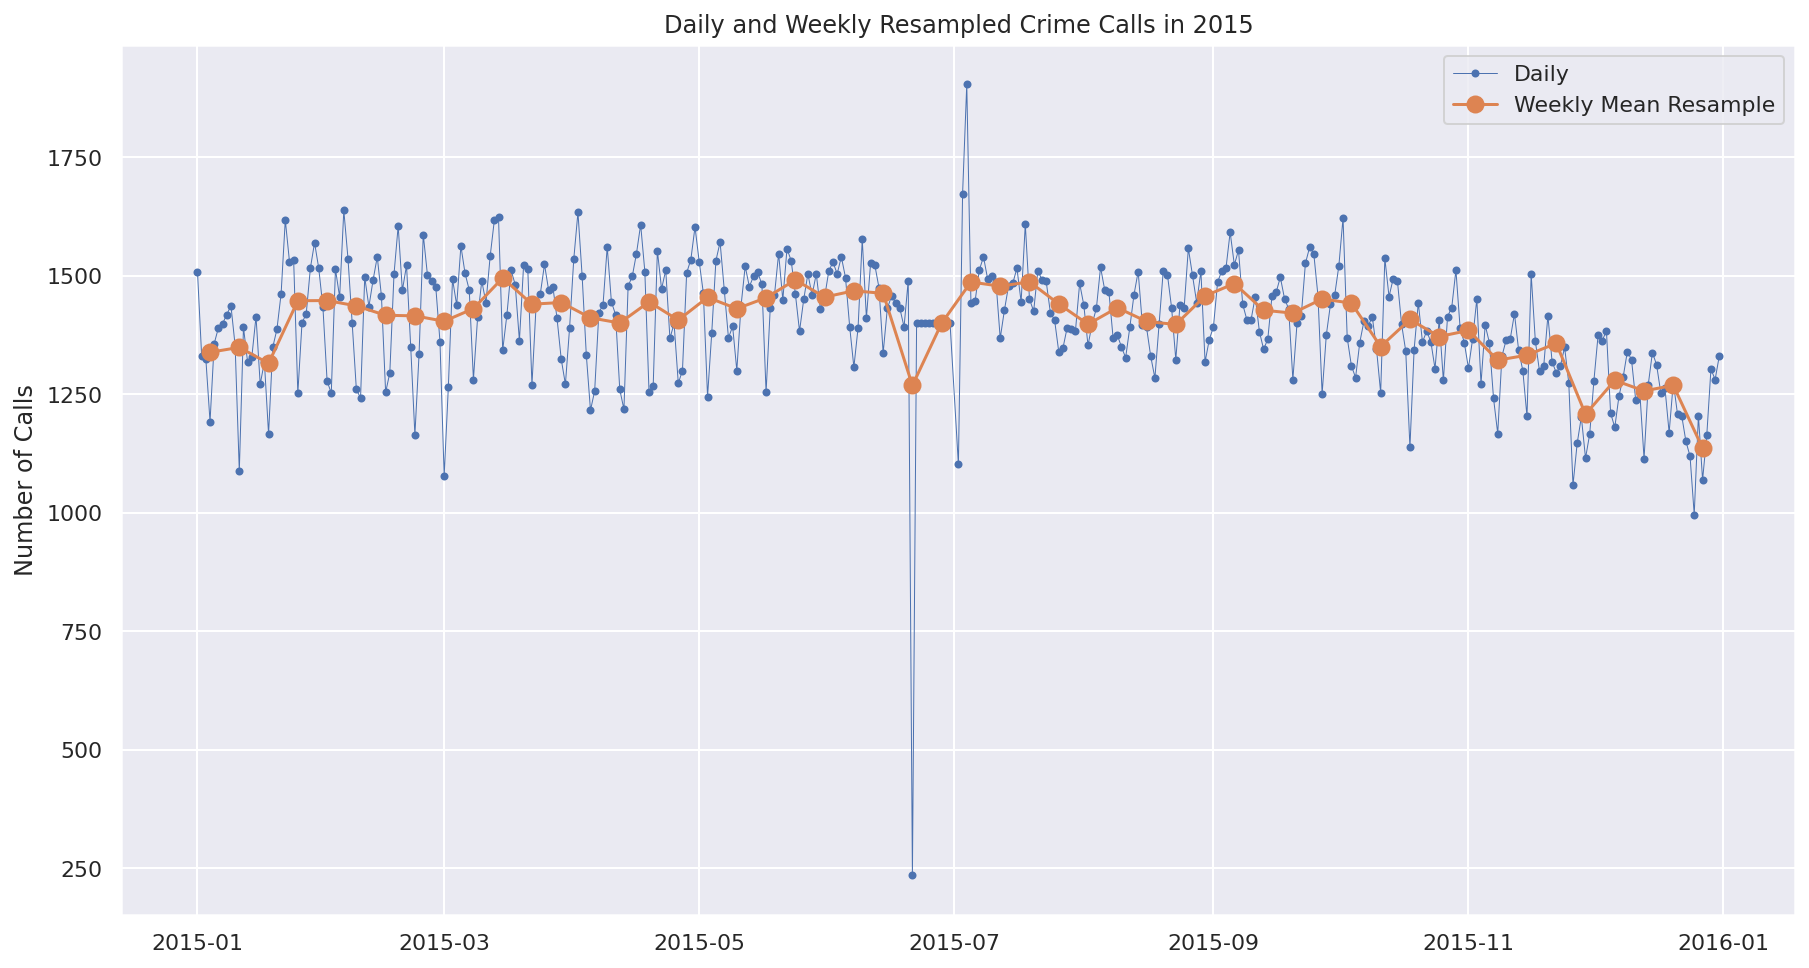

In [29]:
# Start and end of the date range to extract
start, end = '2015-01', '2015-12'
# Plot daily and weekly resampled time series together
fig, ax = plt.subplots(figsize=(15,8))
ax.plot(df_2015_counts.loc[start:end, 'count'],
marker='.', linestyle='-', linewidth=0.5, label='Daily')
ax.plot(df_2015_mean.loc[start:end, 'count'],
marker='o', markersize=8, linestyle='-', label='Weekly Mean Resample')
ax.set_ylabel('Number of Calls')
ax.legend();
ax.set_title('Daily and Weekly Resampled Crime Calls in 2015')

Text(0.5, 1.0, 'Daily and Weekly Resampled Crime Calls in 2016')

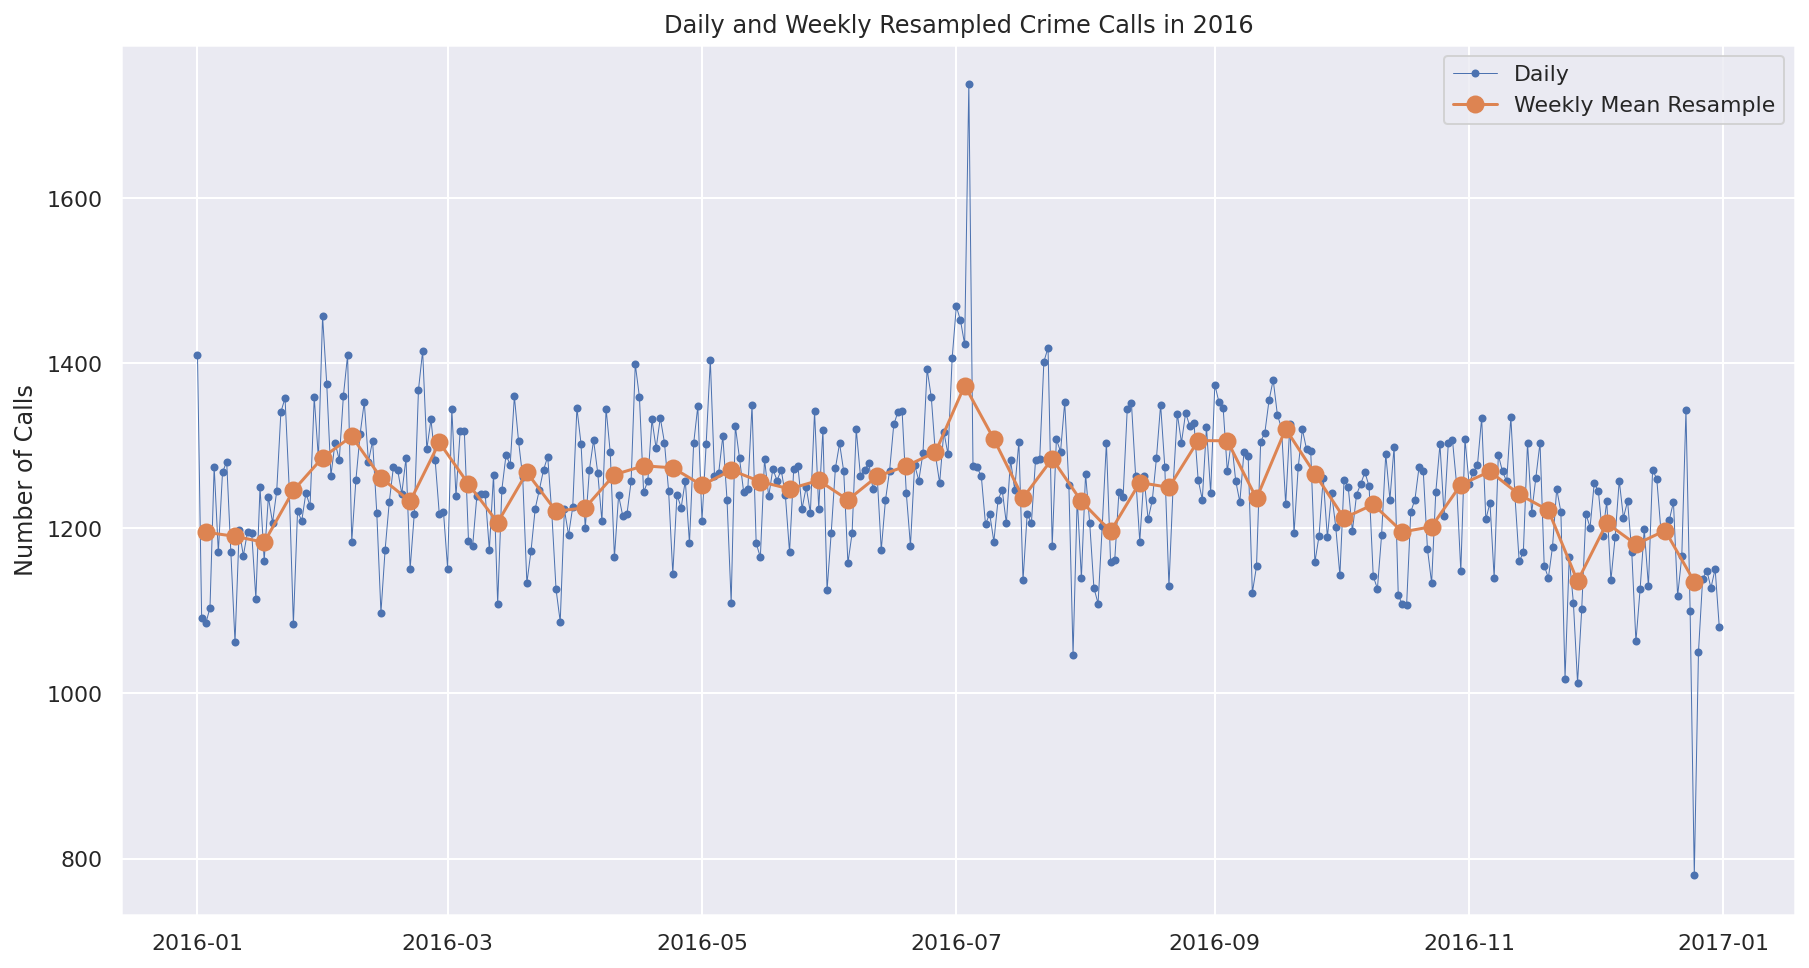

In [30]:
# Start and end of the date range to extract
start, end = '2016-01', '2016-12'
# Plot daily and weekly resampled time series together
fig, ax = plt.subplots(figsize=(15,8))
ax.plot(df_2016_counts.loc[start:end, 'count'],
marker='.', linestyle='-', linewidth=0.5, label='Daily')
ax.plot(df_2016_mean.loc[start:end, 'count'],
marker='o', markersize=8, linestyle='-', label='Weekly Mean Resample')
ax.set_ylabel('Number of Calls')
ax.legend();
ax.set_title('Daily and Weekly Resampled Crime Calls in 2016')

Text(0.5, 1.0, 'Daily and Weekly Resampled Crime Calls in 2017')

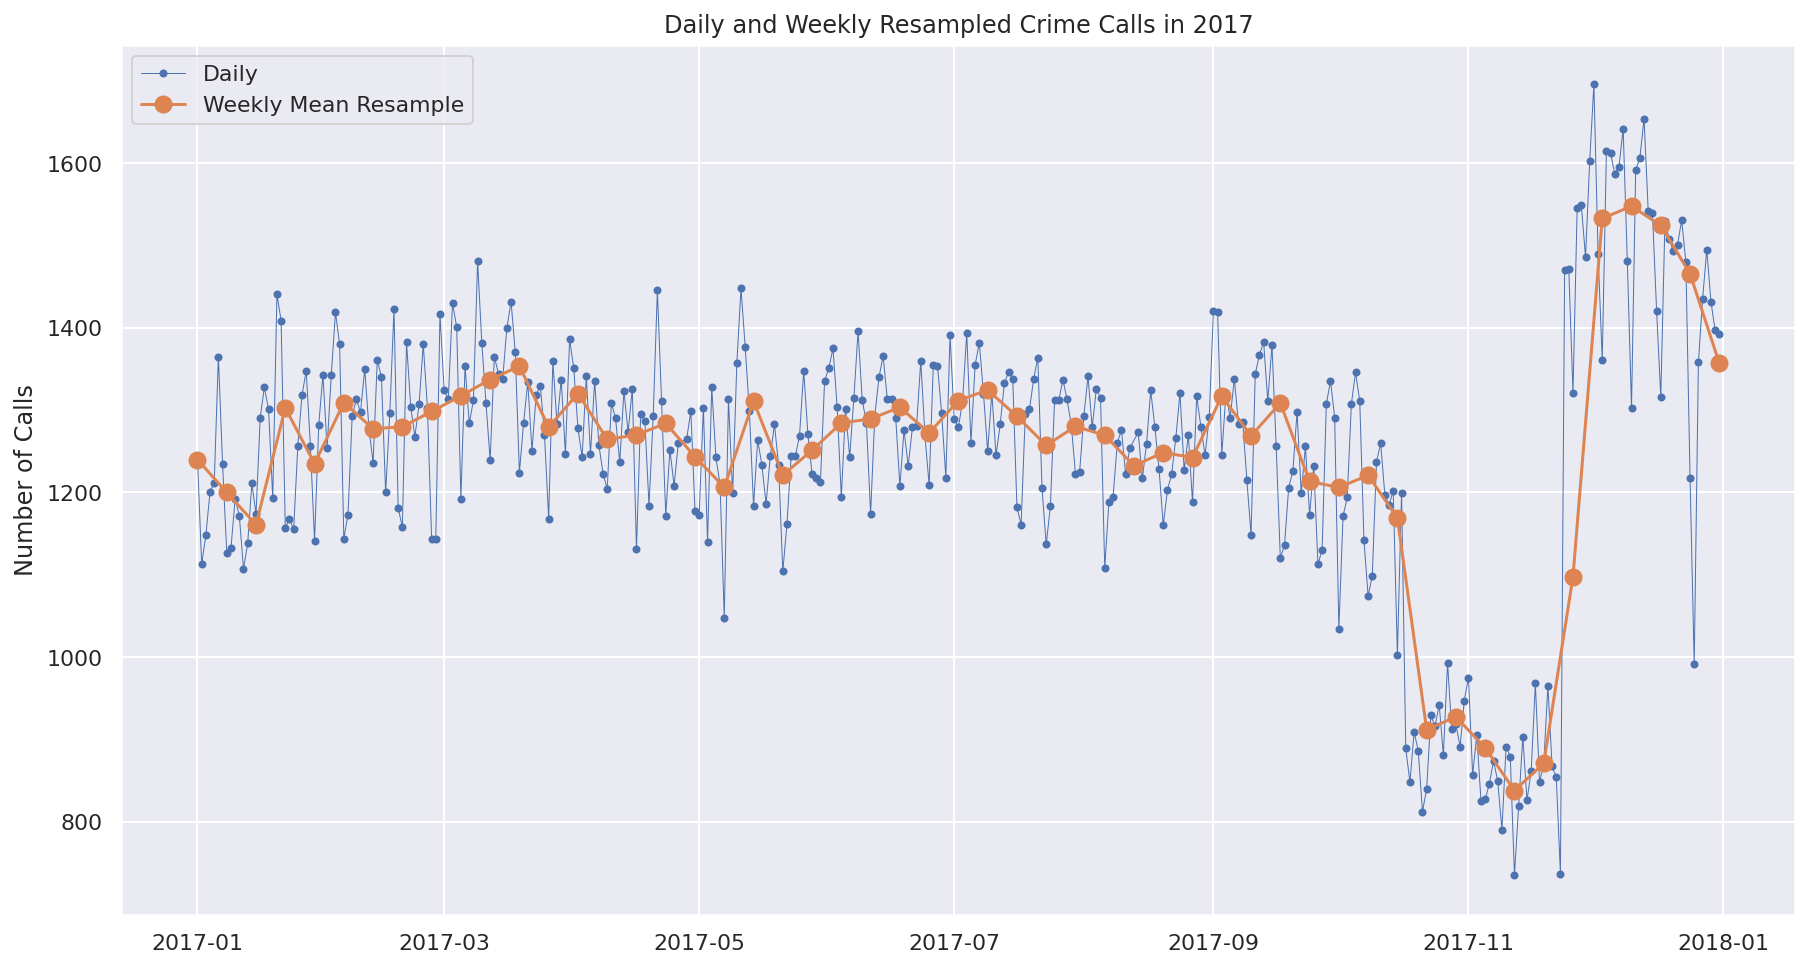

In [31]:
# Start and end of the date range to extract
start, end = '2017-01', '2017-12'
# Plot daily and weekly resampled time series together
fig, ax = plt.subplots(figsize=(15,8))
ax.plot(df_2017_counts.loc[start:end, 'count'],
marker='.', linestyle='-', linewidth=0.5, label='Daily')
ax.plot(df_2017_mean.loc[start:end, 'count'],
marker='o', markersize=8, linestyle='-', label='Weekly Mean Resample')
ax.set_ylabel('Number of Calls')
ax.legend();
ax.set_title('Daily and Weekly Resampled Crime Calls in 2017')

Text(0.5, 1.0, 'Daily and Weekly Resampled Crime Calls in 2018')

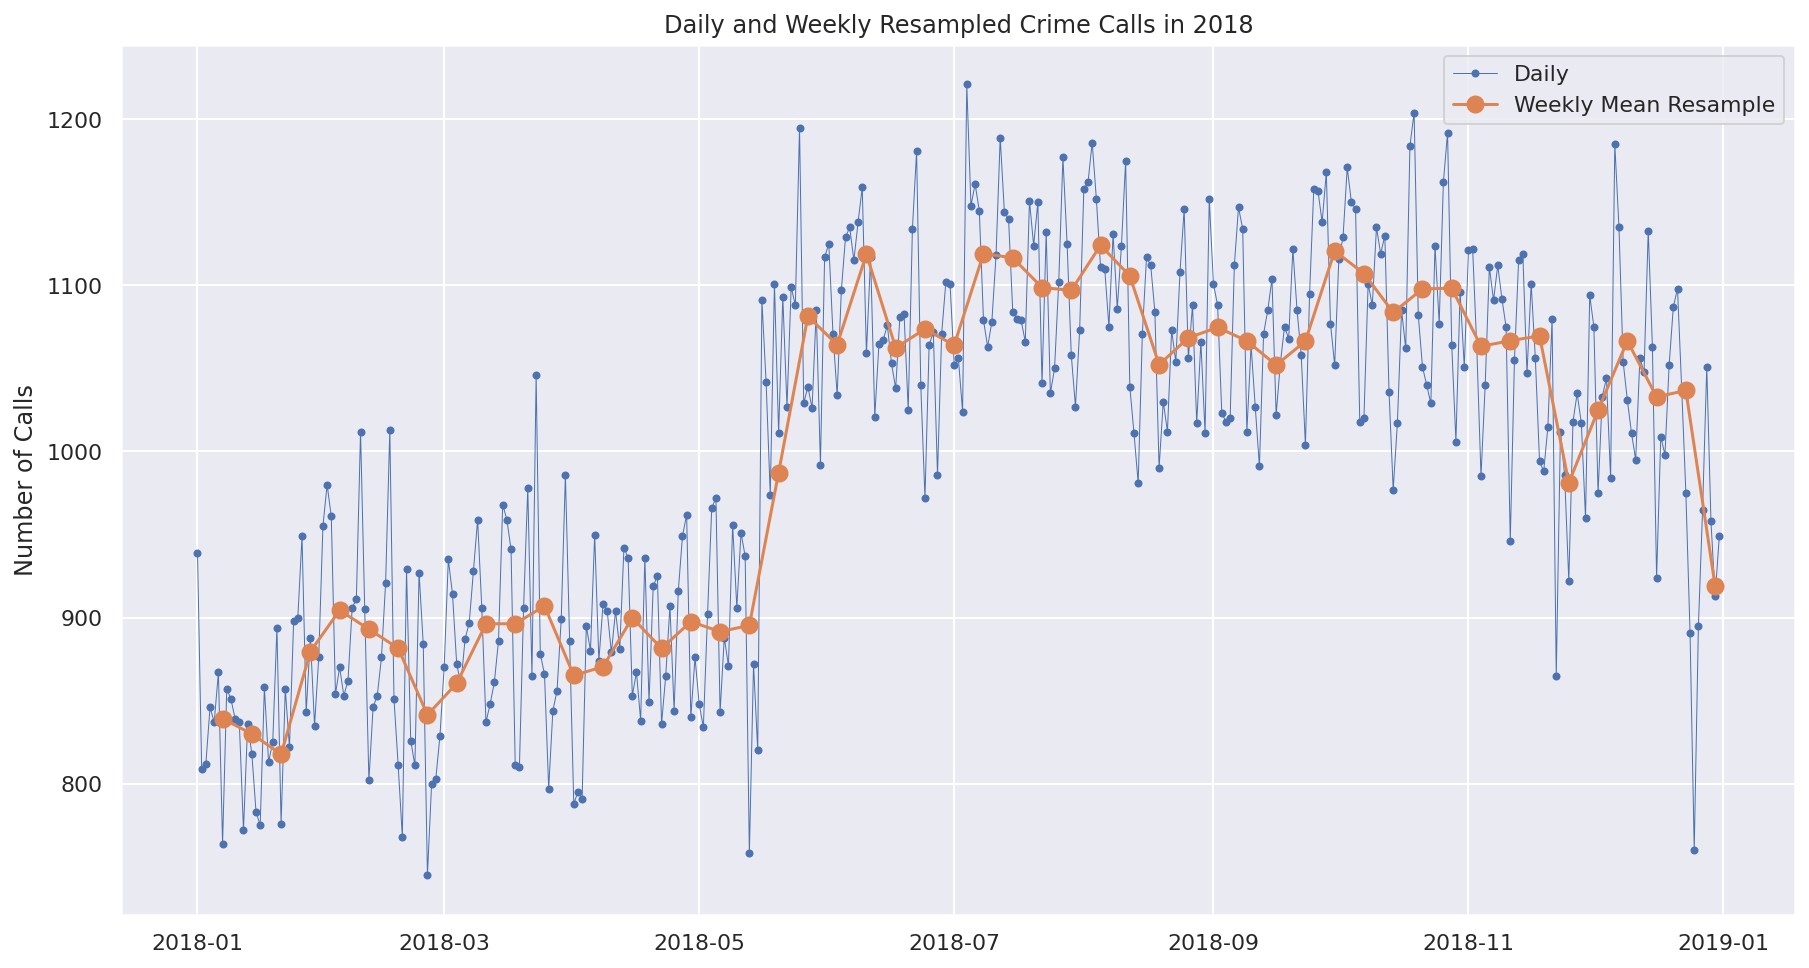

In [32]:
# Start and end of the date range to extract
start, end = '2018-01', '2018-12'
# Plot daily and weekly resampled time series together
fig, ax = plt.subplots(figsize=(15,8))
ax.plot(df_2018_counts.loc[start:end, 'count'],
marker='.', linestyle='-', linewidth=0.5, label='Daily')
ax.plot(df_2018_mean.loc[start:end, 'count'],
marker='o', markersize=8, linestyle='-', label='Weekly Mean Resample')
ax.set_ylabel('Number of Calls')
ax.legend();
ax.set_title('Daily and Weekly Resampled Crime Calls in 2018')

Text(0.5, 1.0, 'Daily and Weekly Resampled Crime Calls in 2019')

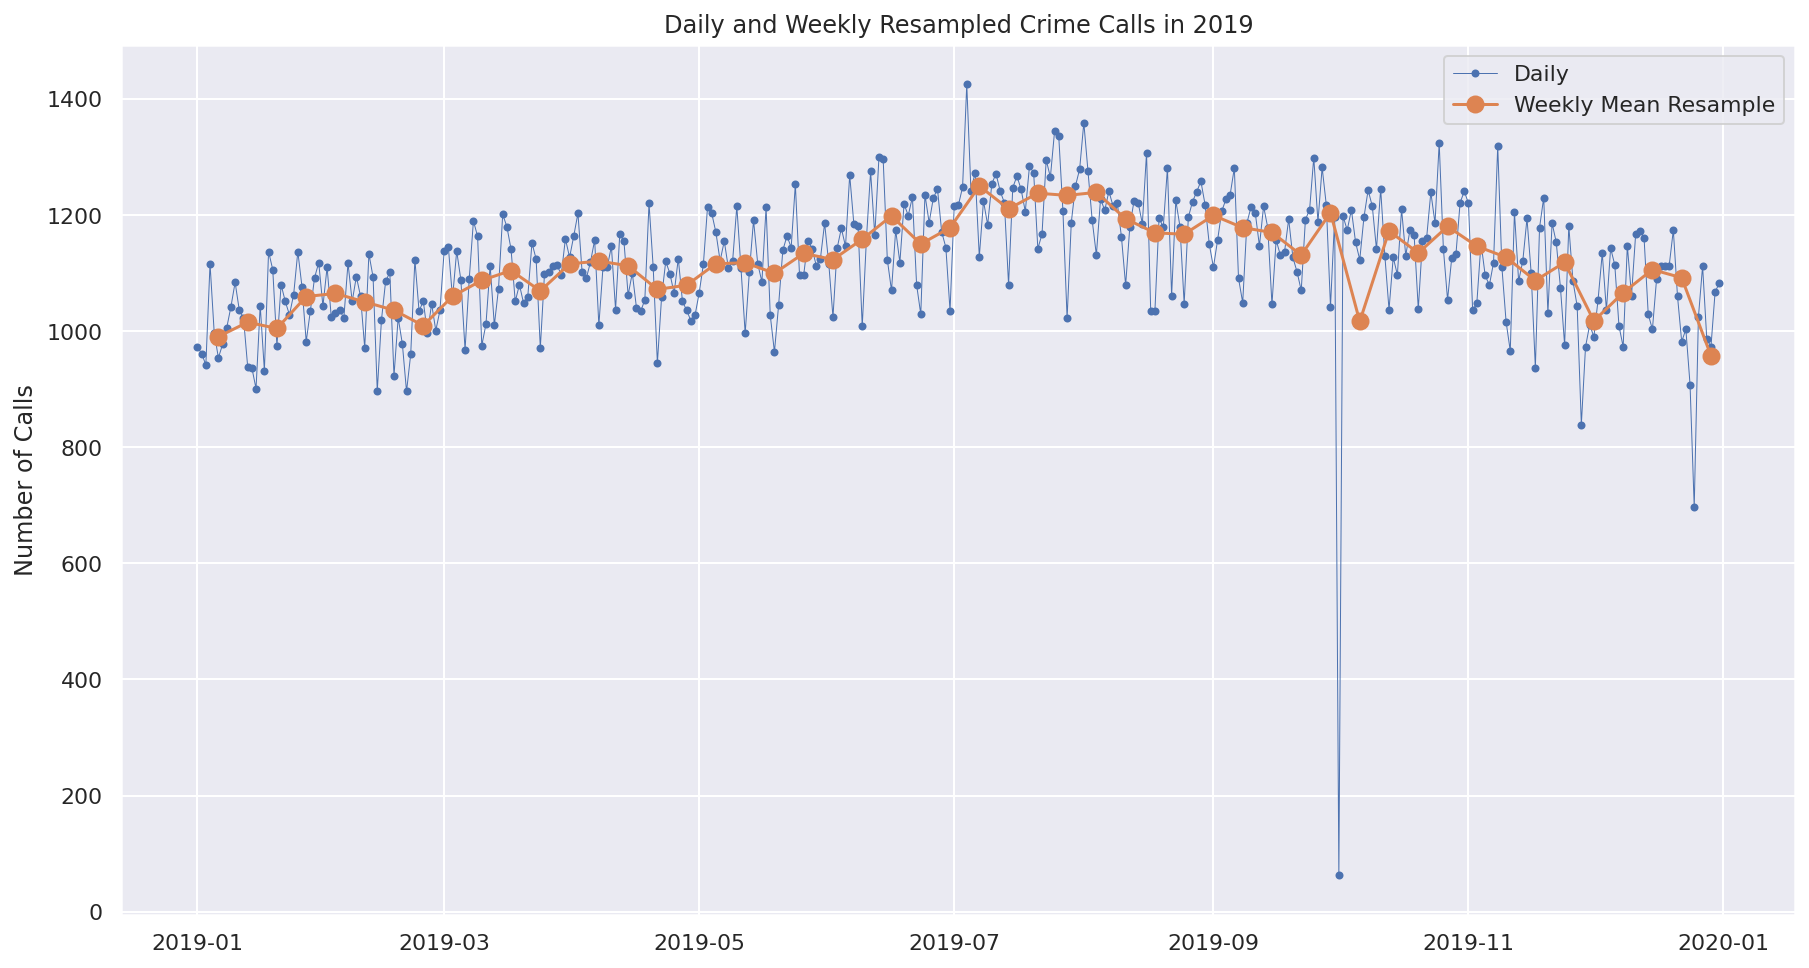

In [33]:
# Start and end of the date range to extract
start, end = '2019-01', '2019-12'
# Plot daily and weekly resampled time series together
fig, ax = plt.subplots(figsize=(15,8))
ax.plot(df_2019_counts.loc[start:end, 'count'],
marker='.', linestyle='-', linewidth=0.5, label='Daily')
ax.plot(df_2019_mean.loc[start:end, 'count'],
marker='o', markersize=8, linestyle='-', label='Weekly Mean Resample')
ax.set_ylabel('Number of Calls')
ax.legend();
ax.set_title('Daily and Weekly Resampled Crime Calls in 2019')

Text(0.5, 1.0, 'Daily and Weekly Resampled Crime Calls in 2020')

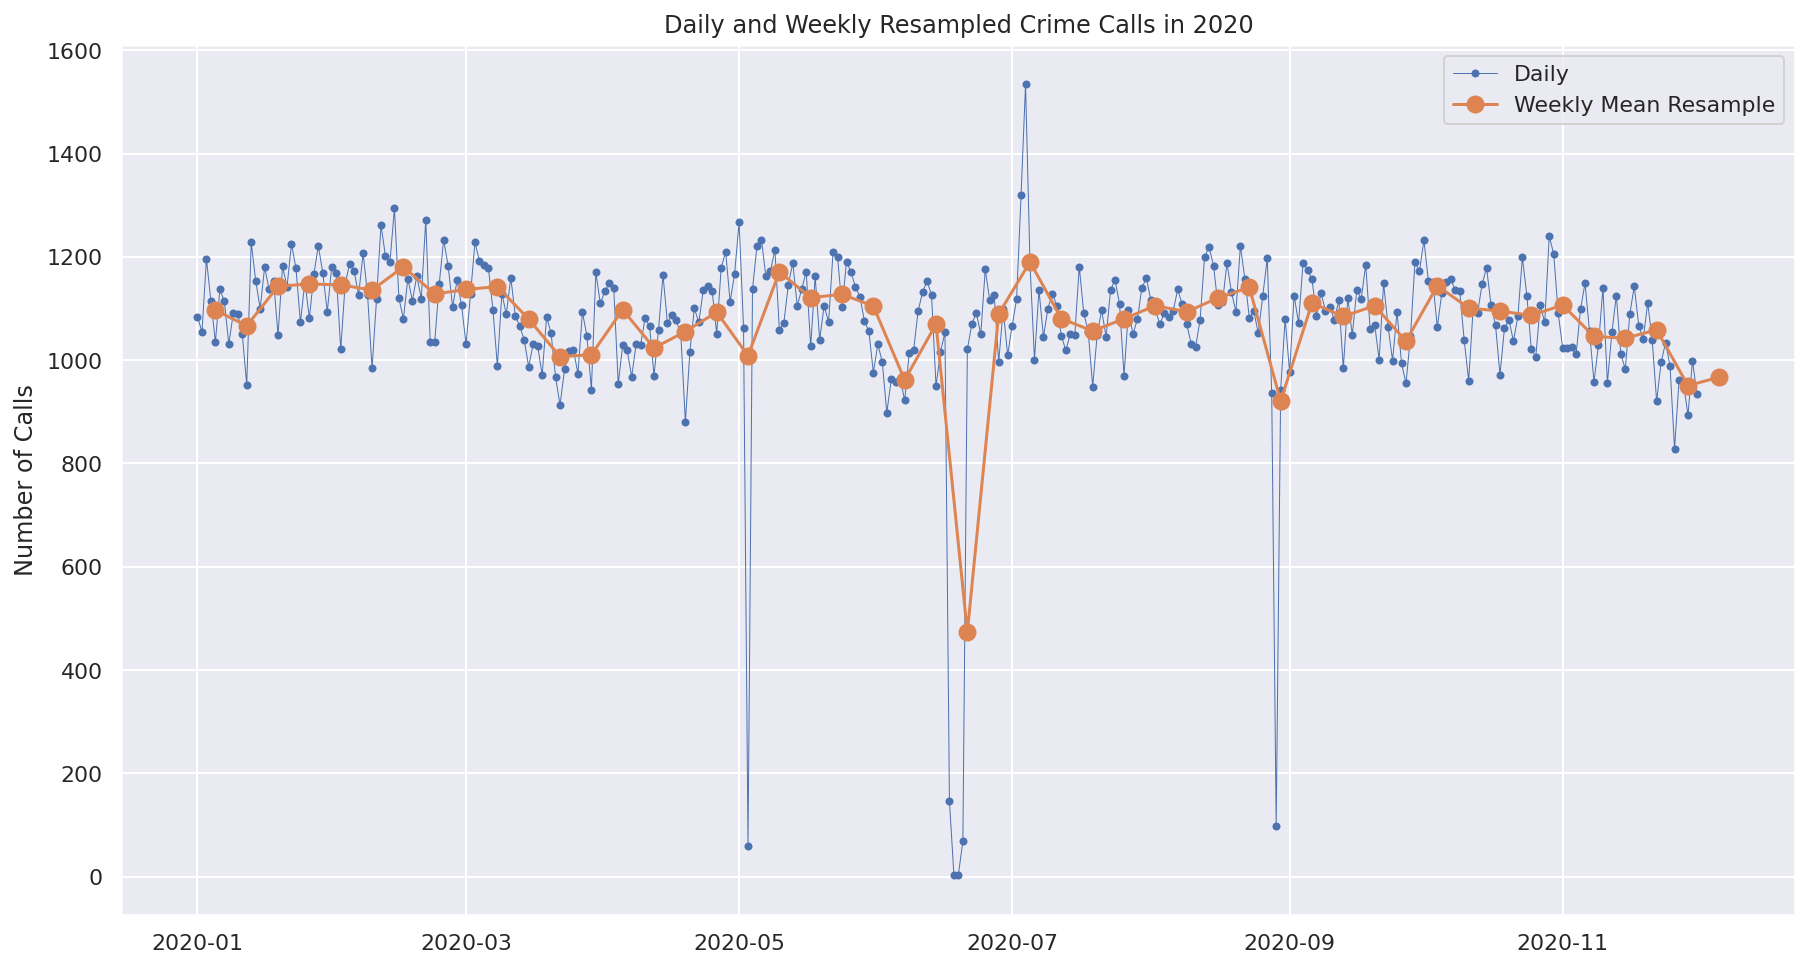

In [34]:
# Start and end of the date range to extract
start, end = '2020-01', '2020-12'
# Plot daily and weekly resampled time series together
fig, ax = plt.subplots(figsize=(15,8))
ax.plot(df_2020_counts.loc[start:end, 'count'],
marker='.', linestyle='-', linewidth=0.5, label='Daily')
ax.plot(df_2020_mean.loc[start:end, 'count'],
marker='o', markersize=8, linestyle='-', label='Weekly Mean Resample')
ax.set_ylabel('Number of Calls')
ax.legend();
ax.set_title('Daily and Weekly Resampled Crime Calls in 2020')

Figures 4: These plots take the daily and weekly mean resampled number of crime calls per year to get a visualization of what the numbers look like throughout the year. The trend of calls in 2015, 2016, 2019, and 2020 were all fairly steady throughout the year. In 2017 the calls had a sudden dip in November and quickly spiked in November again. In 2018 crime calls started off fairly low in the year and spiked in June and steadily stayed between 1000 and 1200 calls a day for the rest of the year.

In [35]:
#Monthly resample sum
df_2020_monthly = pd.DataFrame(df_2020_counts['count'].resample('M').sum(min_count=28))

df_2019_monthly = pd.DataFrame(df_2019_counts['count'].resample('M').sum(min_count=28))

df_2018_monthly = pd.DataFrame(df_2018_counts['count'].resample('M').sum(min_count=28))

df_together = pd.DataFrame(df_together['count'].resample('M').sum(min_count=28))

Text(0.5, 1.0, 'Total Number of Crime Calls From 2015 to 2020 By Month')

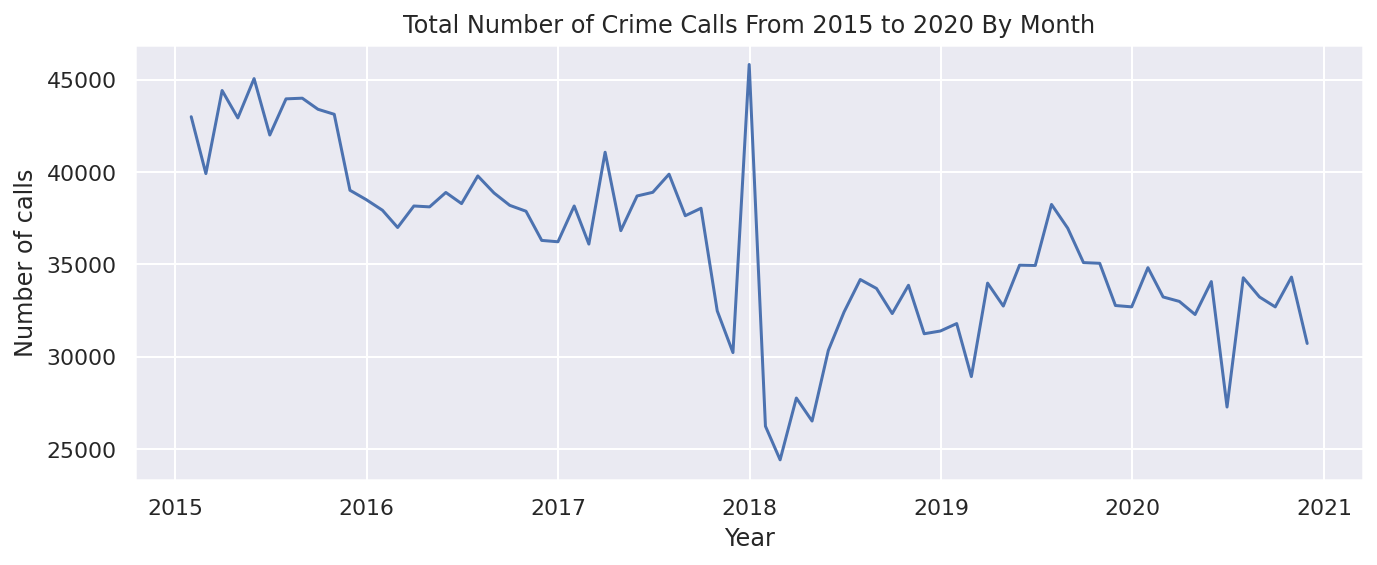

In [36]:
#Total Number of Crime Calls From 2015 to 2020 By Month
plt.xlabel('Year')
plt.ylabel('Number of calls')
plt.plot(df_together['count'])
plt.title('Total Number of Crime Calls From 2015 to 2020 By Month')

Figure 5: This figure shows a monthly resampled sum of crime calls continuously from 2015 to 2020. It suggests that crime overall has been decreasing since 2015 with a huge spike in the beginning of 2018. Every year there also appears to be a small spike toward the middle of the year.

In [37]:
#Rolling mean by year
df_365d = df_together['count'].rolling(window=365, center=True, min_periods=360).mean()

In [38]:
#Calculating the rolling mean and rolling standard deviation values
rolmean = df_together.rolling(window=12).mean()
rolstd = df_together.rolling(window=12).std()
print(rolmean, rolstd)

                   count
2015-01-31           NaN
2015-02-28           NaN
2015-03-31           NaN
2015-04-30           NaN
2015-05-31           NaN
...                  ...
2020-08-31  33143.833333
2020-09-30  32944.000000
2020-10-31  32881.666667
2020-11-30  32710.333333
2020-12-31           NaN

[72 rows x 1 columns]                   count
2015-01-31          NaN
2015-02-28          NaN
2015-03-31          NaN
2015-04-30          NaN
2015-05-31          NaN
...                 ...
2020-08-31  2088.336782
2020-09-30  1998.172711
2020-10-31  1937.206111
2020-11-30  2036.821291
2020-12-31          NaN

[72 rows x 1 columns]


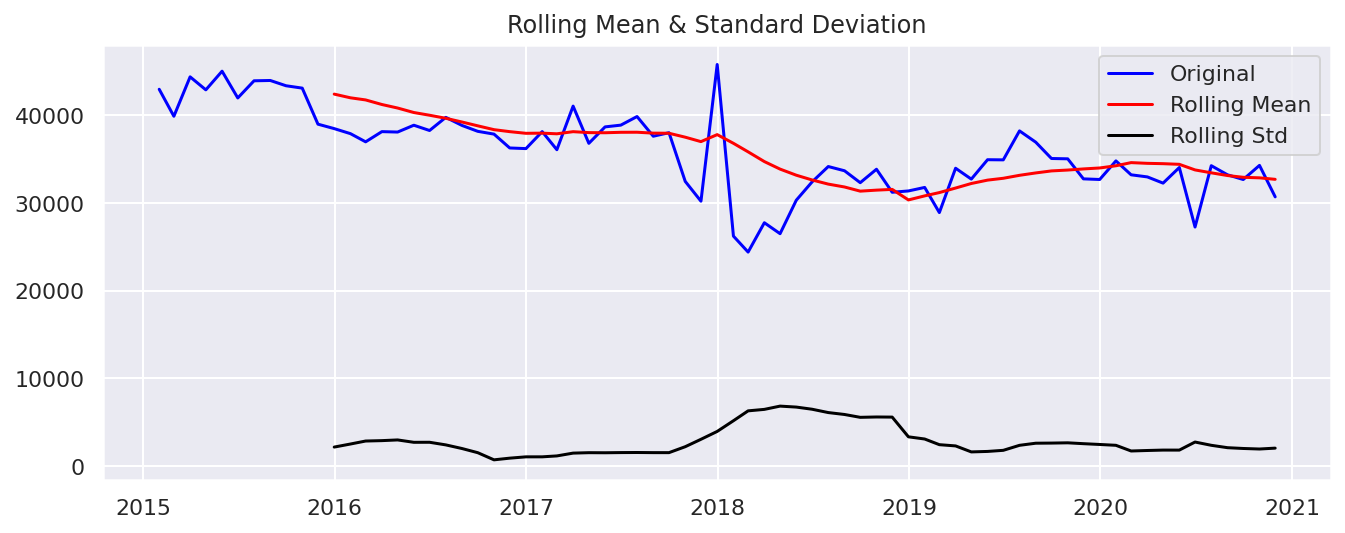

In [39]:
#Plotting rolling mean and standard deviation
orig = plt.plot(df_together, color='blue', label='Original')
mean = plt.plot(rolmean, color='red', label = 'Rolling Mean')
std = plt.plot(rolstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [40]:
from statsmodels.tsa.stattools import adfuller
print('Results of Dickey-Fuller Test:')
dftest = adfuller(df_together['count'], autolag='AIC')

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value(%s) '%key] = value
    
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                       NaN
p-value                              NaN
#Lags Used                      0.000000
Number of Observations Used    71.000000
Critical Value(1%)             -3.526005
Critical Value(5%)             -2.903200
Critical Value(10%)            -2.588995
dtype: float64


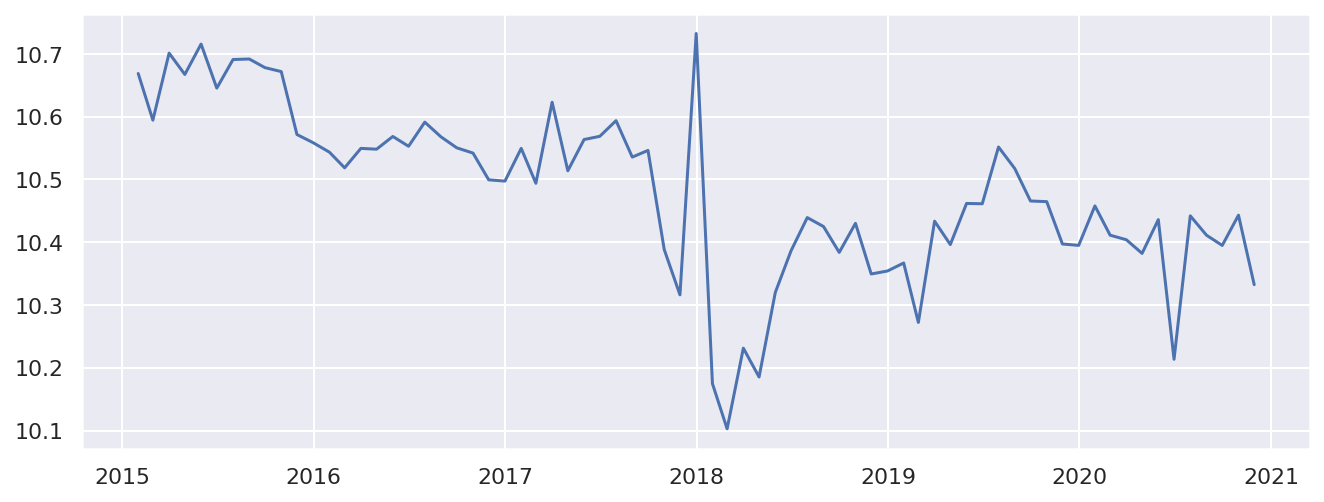

In [41]:
#Converting to log scale
df_logScale = np.log(df_together)
plt.plot(df_logScale)

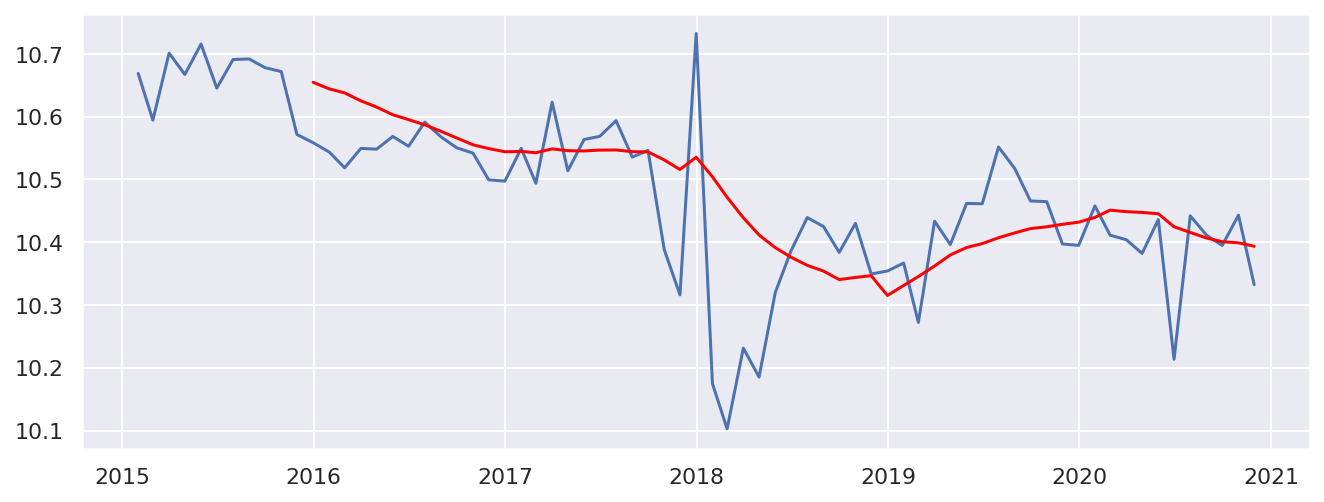

In [42]:
#Calculating moving average and moving standard deviation
movingAverage = df_logScale.rolling(window=12).mean()
movingSTD = df_logScale.rolling(window=12).std()
plt.plot(df_logScale)
plt.plot(movingAverage, color='red')

In [43]:
log_minus_avg = df_logScale - movingAverage
log_minus_avg.head(12)

log_minus_avg.dropna(inplace=True)
log_minus_avg.head(10)

,count
2015-12-31,-0.096148
2016-01-31,-0.100750
2016-02-29,-0.119359
2016-03-31,-0.075730
2016-04-30,-0.067072
2016-05-31,-0.034546
2016-06-30,-0.042458
2016-07-31,0.004263
2016-08-31,-0.008898
2016-09-30,-0.015624


In [44]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):

    #Determining rolling statistics
    movingAverage = timeseries.rolling(window=12).mean()
    movingSTD = timeseries.rolling(window=12).std()

    #Plot rolling statistics
    orig = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(movingAverage, color='red', label = 'Rolling Mean')
    std = plt.plot(movingSTD, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

    #Perform Dickey-Fuller test
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')

    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value(%s) '%key] = value
    
    print(dfoutput)

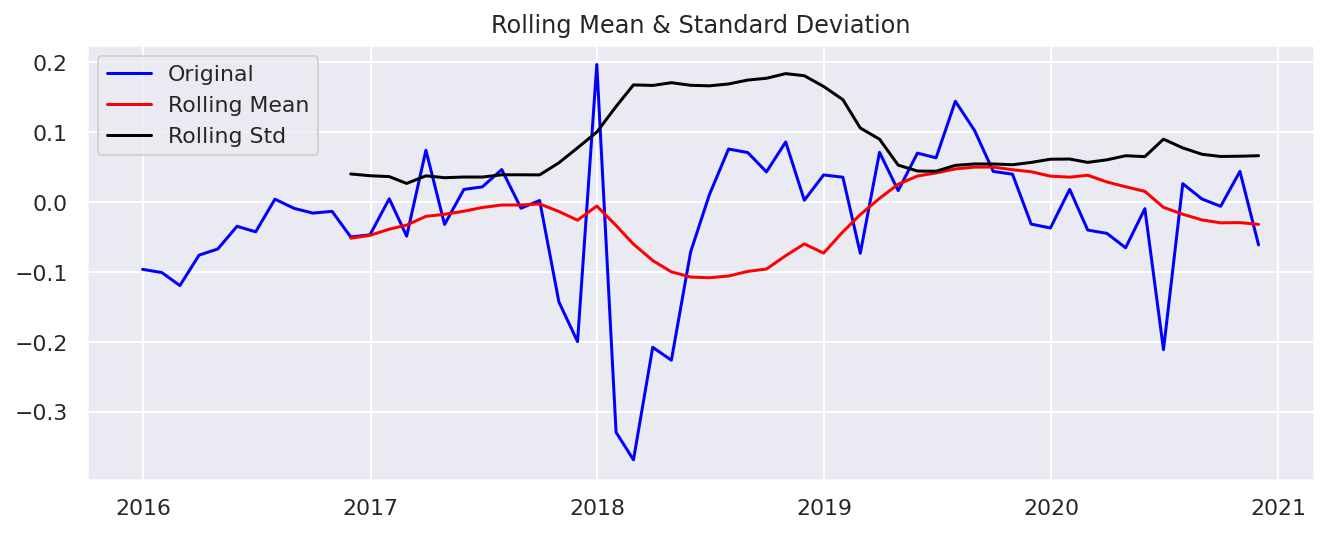

Results of Dickey-Fuller Test:
Test Statistic                 -5.107481
p-value                         0.000014
#Lags Used                      0.000000
Number of Observations Used    59.000000
Critical Value(1%)             -3.546395
Critical Value(5%)             -2.911939
Critical Value(10%)            -2.593652
dtype: float64


In [45]:
test_stationarity(log_minus_avg)

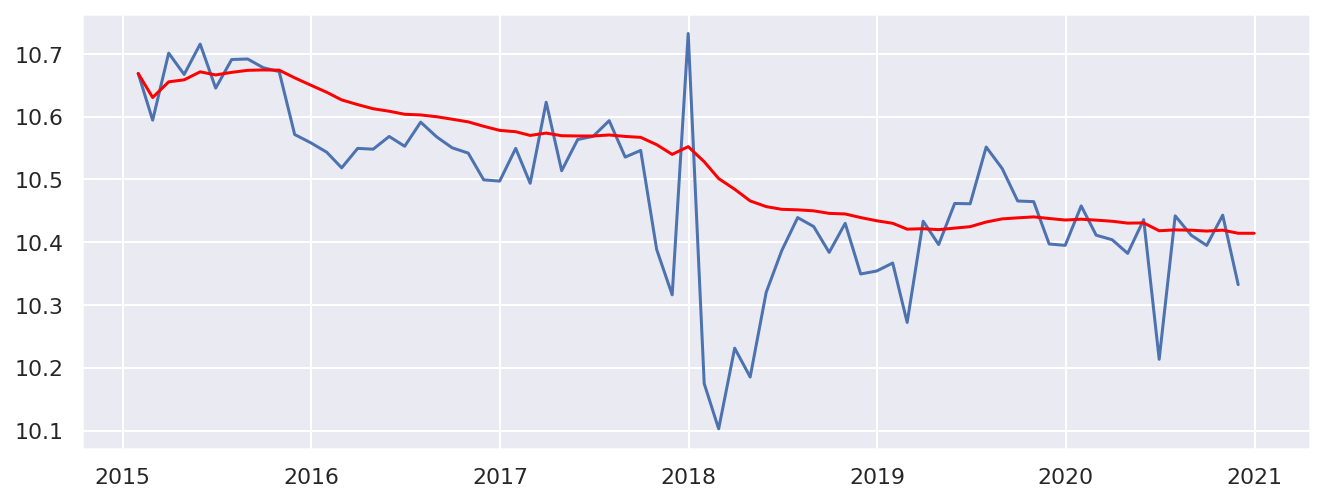

In [46]:
exponentialDecayWeightedAverage = df_logScale.ewm(halflife=12, min_periods=0, adjust=True).mean()
plt.plot(df_logScale)
plt.plot(exponentialDecayWeightedAverage, color='red')

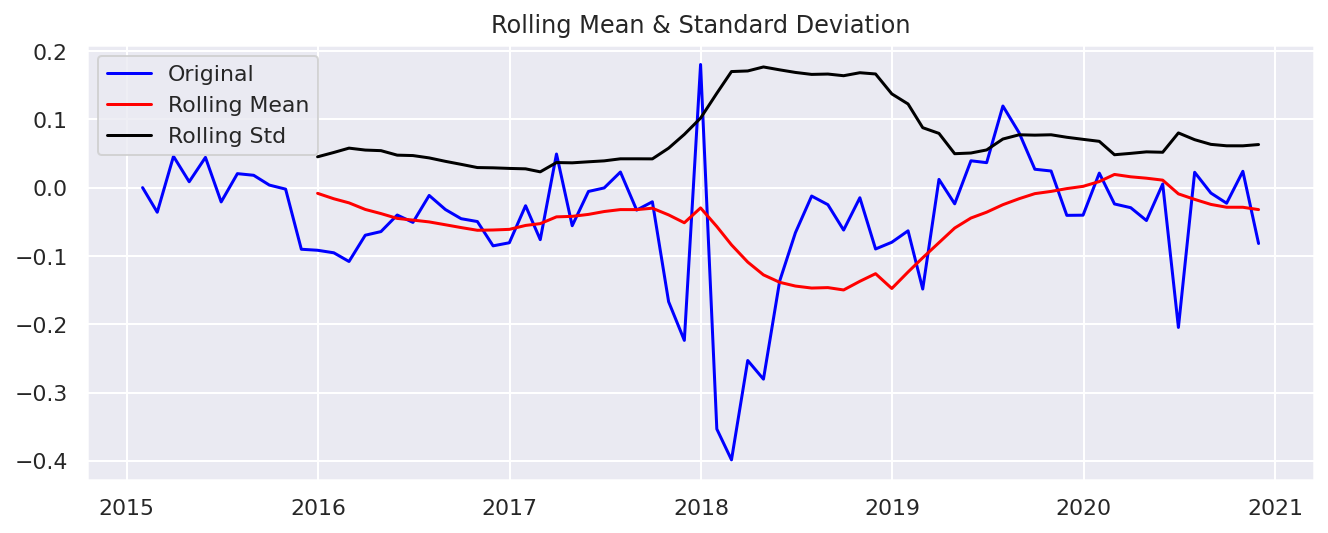

Results of Dickey-Fuller Test:
Test Statistic                       NaN
p-value                              NaN
#Lags Used                      0.000000
Number of Observations Used    71.000000
Critical Value(1%)             -3.526005
Critical Value(5%)             -2.903200
Critical Value(10%)            -2.588995
dtype: float64


In [47]:
logMinusMovingExponentialDecayAverage = df_logScale - exponentialDecayWeightedAverage
test_stationarity(logMinusMovingExponentialDecayAverage)

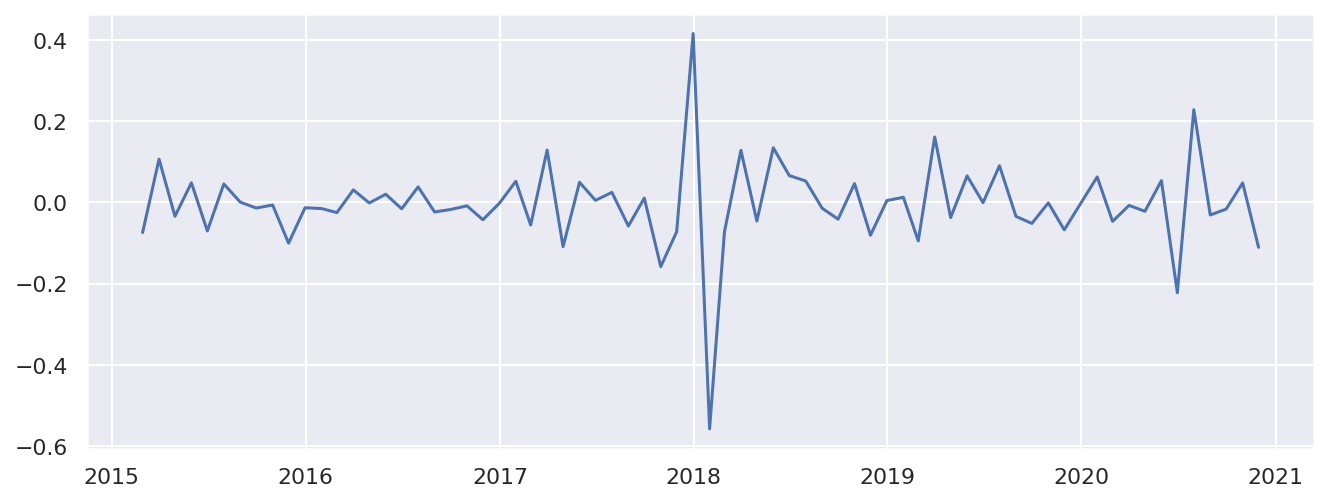

In [48]:
logDiffShifting = df_logScale - df_logScale.shift()
plt.plot(logDiffShifting)

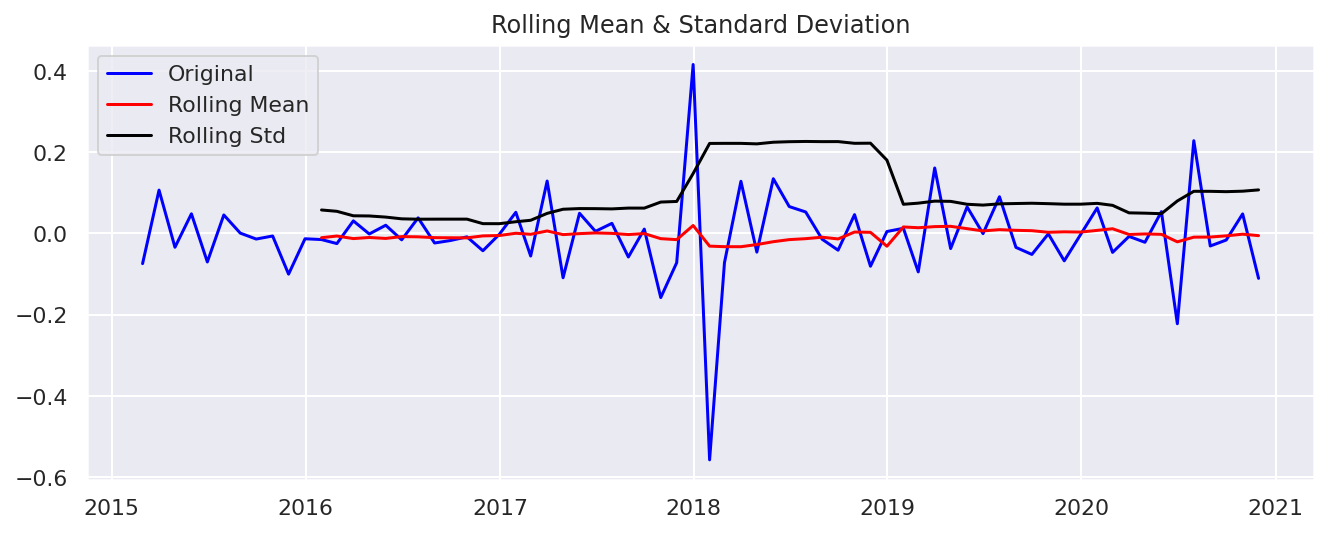

Results of Dickey-Fuller Test:
Test Statistic                -9.381748e+00
p-value                        6.927410e-16
#Lags Used                     1.000000e+00
Number of Observations Used    6.800000e+01
Critical Value(1%)            -3.530399e+00
Critical Value(5%)            -2.905087e+00
Critical Value(10%)           -2.590001e+00
dtype: float64


In [49]:
logDiffShifting.dropna(inplace=True)
test_stationarity(logDiffShifting)

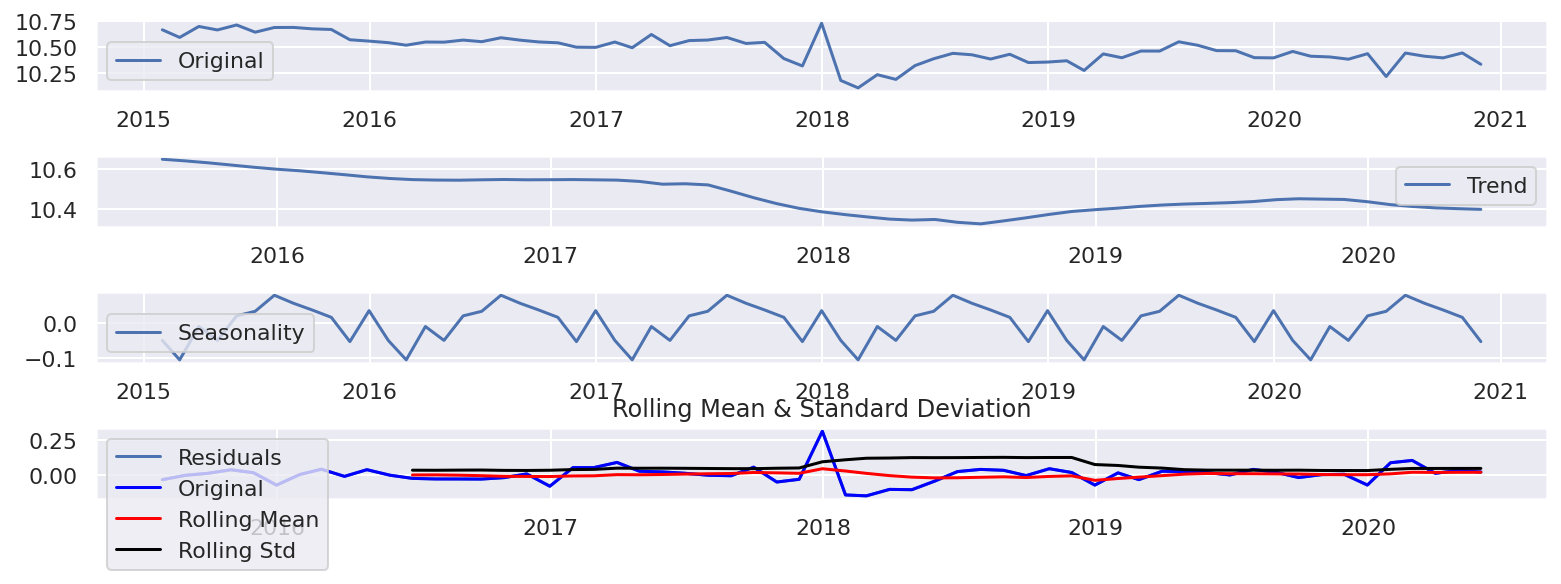

Results of Dickey-Fuller Test:
Test Statistic                -7.279308e+00
p-value                        1.515072e-10
#Lags Used                     0.000000e+00
Number of Observations Used    5.800000e+01
Critical Value(1%)            -3.548494e+00
Critical Value(5%)            -2.912837e+00
Critical Value(10%)           -2.594129e+00
dtype: float64


In [50]:
#Plotting original, trend, seasonality and rolling mean and standard deviation
from statsmodels.tsa.seasonal import seasonal_decompose
df_logScale.dropna(inplace=True)
decomposition = seasonal_decompose(df_logScale)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(df_logScale, label = 'Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label = 'Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label = 'Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label = 'Residuals')
plt.legend(loc='best')
plt.tight_layout()

decomposedLogData = residual
decomposedLogData.dropna(inplace=True)
test_stationarity(decomposedLogData)


Figure 6: The analysis shows The original plot and its steady trend over the years, along with seasonality and the rolling mean and standard deviation plotted. The seasonality plot shows the highest peak toward the middle of the year around July, indicating that the most amount of high priority calls come in around the summer.

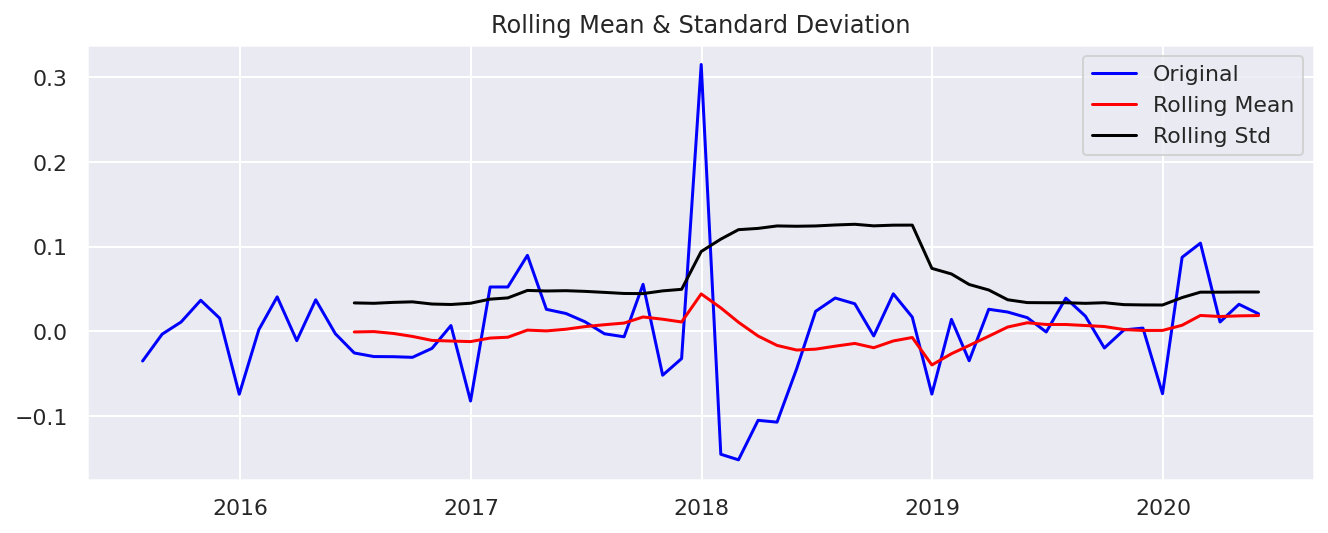

Results of Dickey-Fuller Test:
Test Statistic                -7.279308e+00
p-value                        1.515072e-10
#Lags Used                     0.000000e+00
Number of Observations Used    5.800000e+01
Critical Value(1%)            -3.548494e+00
Critical Value(5%)            -2.912837e+00
Critical Value(10%)           -2.594129e+00
dtype: float64


In [51]:
decomposedLogData = residual
decomposedLogData.dropna(inplace=True)
test_stationarity(decomposedLogData)

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning


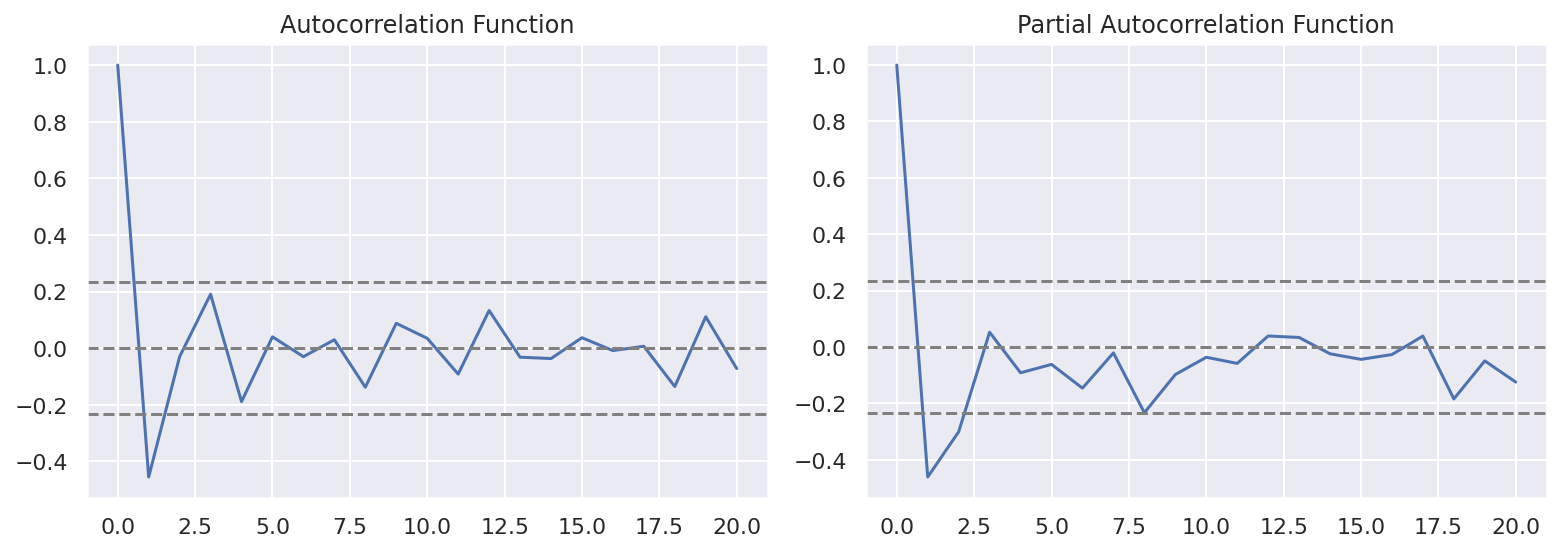

In [52]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(logDiffShifting, nlags = 20)
lag_pacf = pacf(logDiffShifting, nlags = 20, method='ols')

#Plot ACF:
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle = '--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(logDiffShifting)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(logDiffShifting)), linestyle='--', color='gray')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle = '--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(logDiffShifting)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(logDiffShifting)), linestyle='--', color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()



/opt/conda/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


Plottin gAR model


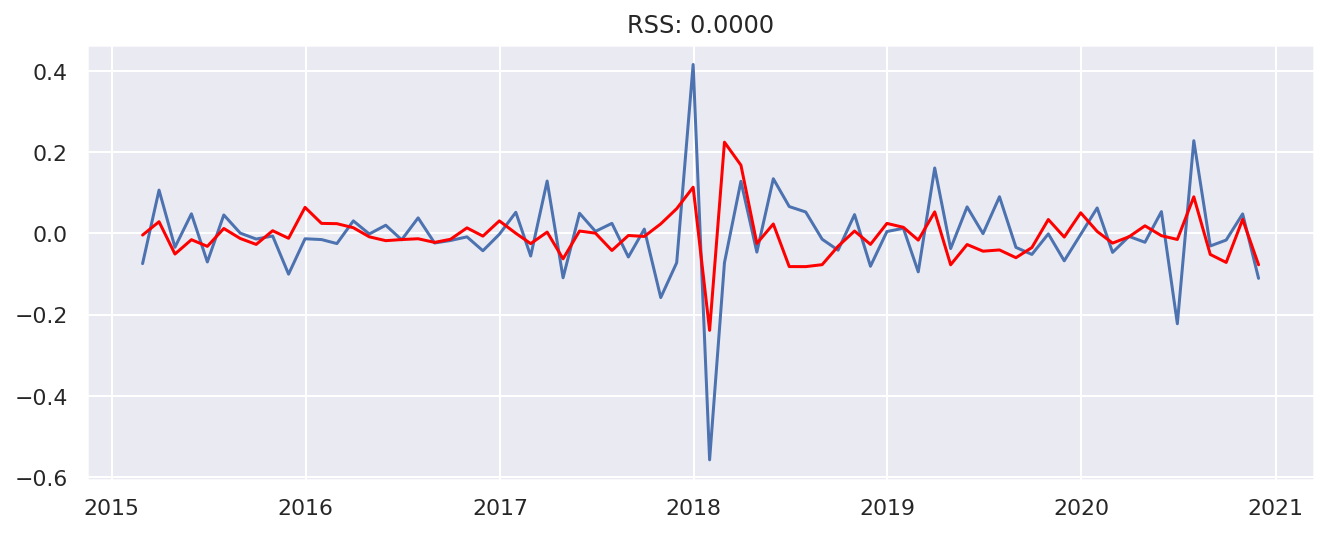

In [53]:
from statsmodels.tsa.arima_model import ARIMA

#AR Model
model = ARIMA(df_logScale, order=(2,1,2))
results_AR = model.fit(disp=-1)
plt.plot(logDiffShifting)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum(results_AR.fittedvalues-logDiffShifting['count'])**2)
print('Plottin gAR model')

Plotting AR model


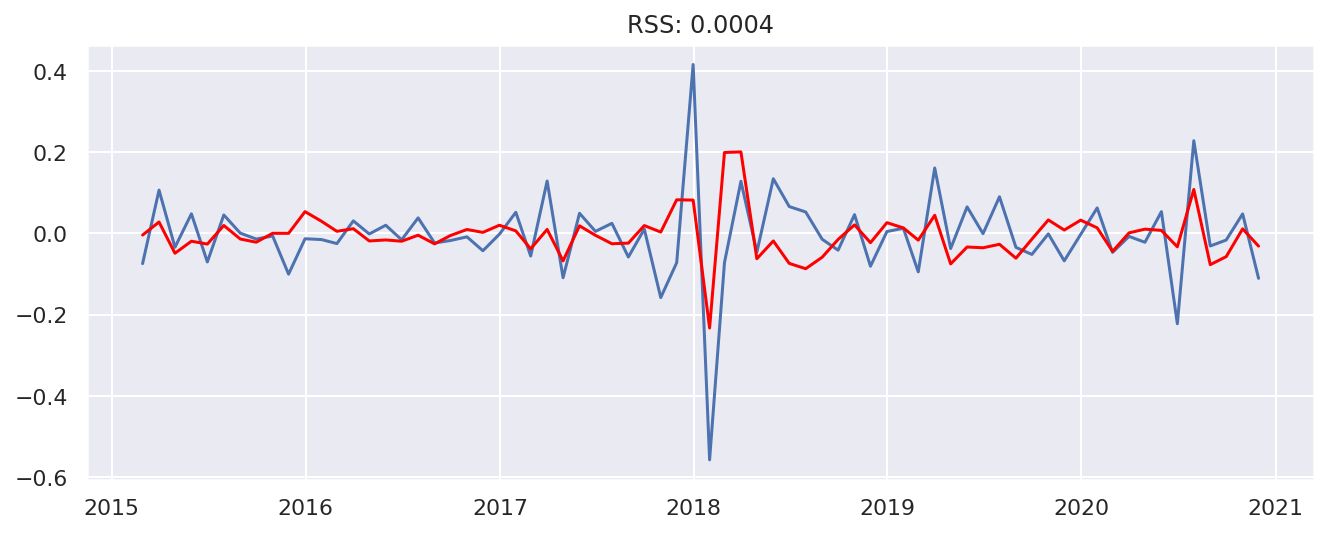

In [54]:
#MA Model
model = ARIMA(df_logScale, order=(2,1,0))
results_MA = model.fit(disp=-1)
plt.plot(logDiffShifting)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum(results_MA.fittedvalues-logDiffShifting['count'])**2)
print('Plotting AR model')

Text(0.5, 1.0, 'RSS: 0.0002')

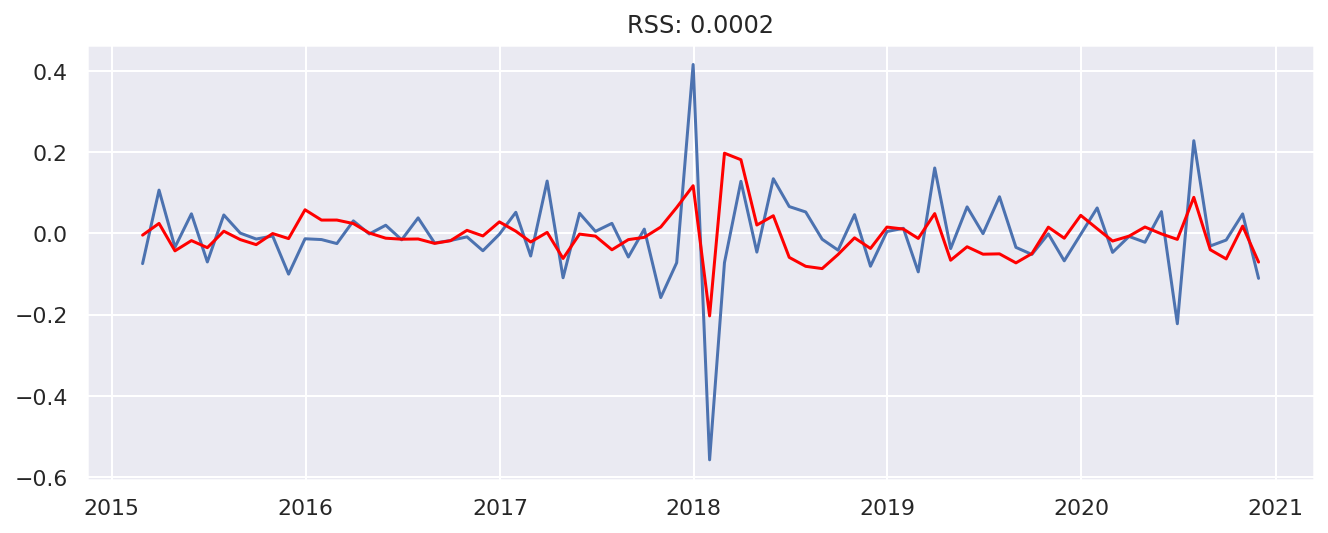

In [55]:
#ARIMA model
model = ARIMA(df_logScale, order=(1,1,2))
results_ARIMA = model.fit(disp=-1)
plt.plot(logDiffShifting)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum(results_ARIMA.fittedvalues-logDiffShifting['count'])**2)

In [56]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(predictions_ARIMA_diff.head())

2015-02-28   -0.004140
2015-03-31    0.024772
2015-04-30   -0.042808
2015-05-31   -0.017603
2015-06-30   -0.035013
Freq: M, dtype: float64


In [57]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum.head())

2015-02-28   -0.004140
2015-03-31    0.020633
2015-04-30   -0.022175
2015-05-31   -0.039778
2015-06-30   -0.074791
Freq: M, dtype: float64


In [58]:
predictions_ARIMA_log = pd.Series(df_logScale['count'].ix[0], index=df_logScale.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value=0)
predictions_ARIMA_log.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


2015-01-31    10.668700
2015-02-28    10.664560
2015-03-31    10.689332
2015-04-30    10.646524
2015-05-31    10.628921
Freq: M, dtype: float64

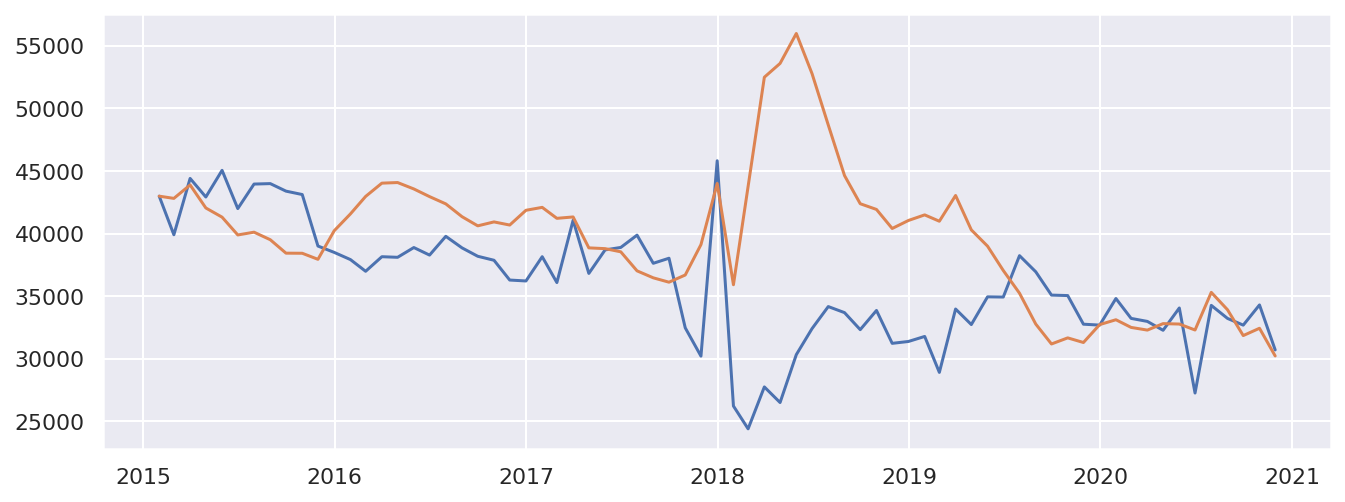

In [59]:
#Forecast plot
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(df_together)
plt.plot(predictions_ARIMA)

Text(0.5, 1.0, 'Prediction of Crime Calls Over The Next 10 Years')

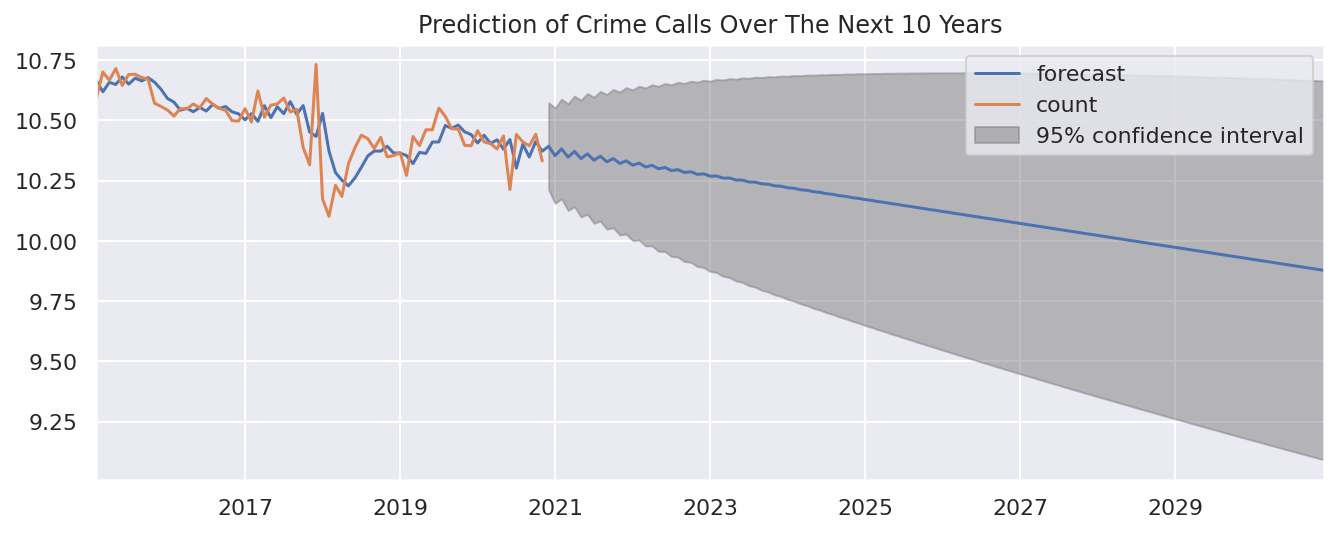

In [60]:
#ARIMA time series forcasting plot
results_ARIMA.plot_predict(1,191)
plt.title('Prediction of Crime Calls Over The Next 10 Years')

Figure 7: This plot shows a prediction of crime calls that will happen over the next 10 years. It forecasts that the number of crime calls will steadily decrease. 

# Ethics & Privacy

The datasets used for this project were all made publicly available on the San Diego dataset website to use for this purpose. There could be privacy concerns regarding the address and location of these calls made that I removed from the dataset to help protect the privacy of those involved. Other than that, no identifying data was used as the only part of the dataset that remained was the total count of calls made. I don't think there are any potential biases for the dataset as it composes of all calls to the San Diego police dispatch center and isn't excluding any particular populations. 

# Conclusion & Discussion

The results show that crime calls had a strong temporal pattern specifically in when they occurred by hour during the day, and during what season they occured the most. No significant relationship was found between crime calls and the weekday they occured on. There is a very strong trend in when the most amount of crime calls occur during the day. The highest peaks were around 10am, again at 3pm, and finally a final spike at 10pm. There was also a trend throughout the years where the highest number of calls were made during the summer and also towards the end of the year around Christmas and New Years Day. My hypothesis did not predict the hours the calls would peak, however the data shows a trend where calls peak the most during the summer and when the weather is the hottest. 

One issue I had with working with the data was the 2015 dataset had missing values for the last 10 days of June. In order to finish my predictive analysis I had to fill in those missing data with the average of calls per day in June, which may alter the accuracy of the data. 

The San Diego Parks and Recreation Department could pay attention to those moments of time specifically and allocate the most resources around those specific hours (10am, 3pm, and 10pm) and during the summer around Christmas and New Years Day to increase efficiency and overall safety in the parks. A good sign is that crime calls appear to be decreasing over the years, and will seem to continue to do so for the forseeable future. 